# Выявление определяющих успешность игры закономерностей (интернет-магазин «Стримчик»)

**Цели исследования**

1. выявить потенциально популярный продукт интернет-магазина "Стримчик"
2. проверить гипотезу: средние пользовательские рейтинги платформ Xbox One и PC одинаковые
3. проверить гипотезу: средние пользовательские рейтинги жанров Action и Sports разные

**Описание данных:**

для проведения анализа представлены данные интернет-магазина "Стримчик" — о продажах игр, оценки пользователей и экспертов, жанры и платформы за период до 2016 года (*файл /datasets/games.csv*). Ниже приведен перечень представленных даных: 

- Name — название игры
- Platform — платформа
- Year_of_Release — год выпуска
- Genre — жанр игры
- NA_sales — продажи в Северной Америке (миллионы проданных копий)
- EU_sales — продажи в Европе (миллионы проданных копий)
- JP_sales — продажи в Японии (миллионы проданных копий)
- Other_sales — продажи в других странах (миллионы проданных копий)
- Critic_Score — оценка критиков (максимум 100)
- User_Score — оценка пользователей (максимум 10)
- Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

**План работы:**

1. открыть файл с данными и изучить общую информацию
2. выполнить предобработку данных
3. провести исследовательский анализ данных, в ходе которого:
    - выбрать платформы с наибольшими суммарными продажами и построить распределение по годам
    - за какой характерный срок появляются новые и исчезают старые платформы
    - установить какие платформы лидируют по продажам, растут или падают
    - выбрать несколько потенциально прибыльных платформ
    - выяснить как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков и соотнести выводы с           продажами игр на других платформах
    - проанализировать общее распределение игр по жанрам
4. составить портрет пользователя каждого региона
5. проверить гипотезы, указанные в целях исследования
6. сформулировать общий вывод

### Открываем файл с данными и изучаем общую информацию

In [1]:
# импортируем нужные библиотеки
from scipy import stats as st
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn
from math import sqrt

In [2]:
# загружаем данные из файла в датафрейм
games = pd.read_csv('/datasets/games.csv')
# выводим основную информацию о датафреймах с помощью метода info()
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


Видим, что в датафрейме 11 столбцов. Значения в 6 из них относятся к вещественному типу, 5 - к текстовому. При этом:

- данные в столбце Year_of_Release (год выпуска игры) относятся к вещественному типу. Учитывая, что речь идет именно о годе, а не о дате выпуска, приведем эти данные к целочисленному типу

- данные в столбце User_Score (оценка пользователей) относятся к текстовому типу. Приведем их к вещественному

Соответствие остальных типов разберем после вывода 20 строчек датафрейма на экран.

Кроме того, приведем названия столбцов к змеиному регистру.

In [3]:
# приведем названия стобцов датафрейма к змеиному регистру
games.columns = games.columns.str.lower()
# проверяем
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [4]:
# выведем первые 20 строчек датафрейма games на экран
games.head(20)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


Видим, что по крайней мере в 3 столбцах из 11 имеются пропуски: critic_score, user_score, rating

In [5]:
# приводим данные в столбце с годом выпуска к целочисленному типу
games['year_of_release'] = games['year_of_release'].astype('Int64')
# проверяем замену типа
print(games['year_of_release'].dtypes)

Int64


In [6]:
# выведем уникальные значения столбца rating
games['rating'].sort_values().unique()

array(['AO', 'E', 'E10+', 'EC', 'K-A', 'M', 'RP', 'T', nan], dtype=object)

Из ообщедоступных источников известно, что ESRB присваивает играм следующие рейтинги:

- EC («Early childhood») — «Для детей младшего возраста»: игра подходит для детей от 3 лет и старше и не содержит материалов, которые родители могли бы счесть неподходящими. Игры, получившие данный рейтинг, изначально разрабатываются для детей и обычно представляют собой развивающие игры

- E («Everyone») — «Для всех»: содержание вполне подходит для возрастной категории старше 6 лет; такие игры могут понравиться и взрослым. Игры с этим рейтингом могут содержать минимальное насилие, в основном «мультяшного» характера

- E10+ («Everyone 10 and older») — «Для всех старше 10 лет»: возрастная категория — от 10 лет. Проекты с данным рейтингом могут содержать немного больше мультипликационного или мягкого насилия, или несколько откровенные сцены

- T («Teen») — «Подросткам 13—19 лет»: игра подходит для подростков старше 13 лет. Проекты из данной категории могут содержать насилие, непристойные сцены, грубый юмор, в меру откровенное сексуальное содержимое, кровь или нечастое использование ненормативной лексики

- M («Mature») — «От 17 лет»: материалы игры не подходят для возрастной категории младше 17 лет. Проекты с данным рейтингом могут содержать достаточно жестокое насилие, большое количество крови с расчленением, непристойные сексуальные сцены или грубую ненормативную лексику, нежелательную для младшей аудитории

- AO («Adults Only 18+») — «Только для взрослых»: содержание игры только для взрослых. Продукты из данной категории могут содержать длительные сцены жестокого насилия и/или очень откровенное сексуальное содержимое, а также сцены с обнажением

- RP ( «Rating Pending»») — «Рейтинг ожидается»: продукт был отправлен в ESRB и ожидает присвоение рейтинга. Данный логотип используется только на рекламных презентациях и в демо-версиях игр до официального релиза

- K-A: игры, содержащие контент, подходящий для широкой аудитории. Этот рейтинг использовался до 1998 года, когда он был переименован в E

Учитывая, что рейтинги K-A и E являются различным обозначением одного и того же контента, для удобства анализа мы переименуем  K-A в E

С пропусками в столбцах датафрейма разберемся на этапе предобработки данных. 

In [7]:
# переименуем рейтинги K-A в E
games['rating'] = games['rating'].str.replace('K-A','E')
# проверим результат
games['rating'].sort_values().unique()

array(['AO', 'E', 'E10+', 'EC', 'M', 'RP', 'T', nan], dtype=object)

Теперь рейтинги соответствуют современной шкале ESRB

In [8]:
# выведем уникальные значения столбца critic_score
games['critic_score'].sort_values().unique()

array([13., 17., 19., 20., 21., 22., 23., 24., 25., 26., 27., 28., 29.,
       30., 31., 32., 33., 34., 35., 36., 37., 38., 39., 40., 41., 42.,
       43., 44., 45., 46., 47., 48., 49., 50., 51., 52., 53., 54., 55.,
       56., 57., 58., 59., 60., 61., 62., 63., 64., 65., 66., 67., 68.,
       69., 70., 71., 72., 73., 74., 75., 76., 77., 78., 79., 80., 81.,
       82., 83., 84., 85., 86., 87., 88., 89., 90., 91., 92., 93., 94.,
       95., 96., 97., 98., nan])

In [9]:
# выведем уникальные значения столбца user_score
games['user_score'].sort_values().unique()

array(['0', '0.2', '0.3', '0.5', '0.6', '0.7', '0.9', '1', '1.1', '1.2',
       '1.3', '1.4', '1.5', '1.6', '1.7', '1.8', '1.9', '2', '2.1', '2.2',
       '2.3', '2.4', '2.5', '2.6', '2.7', '2.8', '2.9', '3', '3.1', '3.2',
       '3.3', '3.4', '3.5', '3.6', '3.7', '3.8', '3.9', '4', '4.1', '4.2',
       '4.3', '4.4', '4.5', '4.6', '4.7', '4.8', '4.9', '5', '5.1', '5.2',
       '5.3', '5.4', '5.5', '5.6', '5.7', '5.8', '5.9', '6', '6.1', '6.2',
       '6.3', '6.4', '6.5', '6.6', '6.7', '6.8', '6.9', '7', '7.1', '7.2',
       '7.3', '7.4', '7.5', '7.6', '7.7', '7.8', '7.9', '8', '8.1', '8.2',
       '8.3', '8.4', '8.5', '8.6', '8.7', '8.8', '8.9', '9', '9.1', '9.2',
       '9.3', '9.4', '9.5', '9.6', '9.7', 'tbd', nan], dtype=object)

Мы видим, что данные в столбце critic_score (оценка критиков) выражены целыми числами в диапазоне от 0 до 100. После обработки пропусков приведем их от вещественного типа к целочисленому.

Данные в столбце user_score (оценка пользователей), выражены десятичными дробями в диапазоне от 0 до 10.

При этом они выражены текстовым типом. Приведем его к вещественному также после обработки пропусков на этапе предобработки данных


**В этом же столбце видим аббревиатуру "tbd". Очевидно, она означает "To Be Determined", то есть "Будет определено" (т.е. в этом случае отсутствует информация о рейтинге игры). Учитывая, что речь идет об отсутствии оценки, заменим "tbd" на "nan" и на этапе "Предобработка данных" обработаем пропуски**

In [10]:
# заменим "tbd" на "nan"
games['user_score'] = games['user_score'].replace('tbd', np.nan)
# проверим результат
games['user_score'].sort_values().unique()



array(['0', '0.2', '0.3', '0.5', '0.6', '0.7', '0.9', '1', '1.1', '1.2',
       '1.3', '1.4', '1.5', '1.6', '1.7', '1.8', '1.9', '2', '2.1', '2.2',
       '2.3', '2.4', '2.5', '2.6', '2.7', '2.8', '2.9', '3', '3.1', '3.2',
       '3.3', '3.4', '3.5', '3.6', '3.7', '3.8', '3.9', '4', '4.1', '4.2',
       '4.3', '4.4', '4.5', '4.6', '4.7', '4.8', '4.9', '5', '5.1', '5.2',
       '5.3', '5.4', '5.5', '5.6', '5.7', '5.8', '5.9', '6', '6.1', '6.2',
       '6.3', '6.4', '6.5', '6.6', '6.7', '6.8', '6.9', '7', '7.1', '7.2',
       '7.3', '7.4', '7.5', '7.6', '7.7', '7.8', '7.9', '8', '8.1', '8.2',
       '8.3', '8.4', '8.5', '8.6', '8.7', '8.8', '8.9', '9', '9.1', '9.2',
       '9.3', '9.4', '9.5', '9.6', '9.7', nan], dtype=object)

In [11]:
# выведем первые 20 строчек датафрейма games на экран
games.head(20)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


In [12]:
games.describe() # запрашиваем распределение по каждому из столбцов датафрейма

,year_of_release,na_sales,eu_sales,jp_sales,other_sales,critic_score
count,16446.000000,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000
mean,2006.484616,0.263377,0.145060,0.077617,0.047342,68.967679
std,5.877050,0.813604,0.503339,0.308853,0.186731,13.938165
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000


Как мы видим, в анализируемом датасете представлены данные за период с 1980 по 2016 год. Явных противоречий, либо маловероятных значений в представленном выше распределении не наблюдается.

На данном этапе при изучении информации о датафрейме мы провели следующую работу с данными:

- привели названия стобцов датафрейма к змеиному регистру
- для удобства дальнейшего анализа в столбце user_score заменили "tbd" (отсутствие информации о рейтинге игры) на "nan" 
- привели данные в столбце с годом выпуска к целочисленному типу
- учитывая, что рейтинги K-A и E являются различным обозначением одного и того же контента, для удобства анализа мы переименовали K-A в E в столбце rating (что соответствует современной шкале ESRB)

Также мы выяснили, что:

- по крайней мере в 3 столбцах из 11 имеются пропуски: critic_score, user_score, rating
- данные в столбце user_score (оценка пользователей) относятся к текстовому типу и после обработки пропусков необходимо           приведение их к вещественному
- данные в столбце critic_score (оценка критиков) выражены целыми числами в диапазоне от 0 до 100; после обработки пропусков     стоит изменить тип с вещественного на целочисленный

Обработку пропусков, поиск и обработку дубликатов и изменение типов данных в столбцах user_score и critic_score мы проведем на следующем этапе исследования (т.е. в ходе предобработки данных)



### Проводим предобработку данных

In [13]:
# проверим количество пропусков в % 
pd.DataFrame(round(games.isna().mean()*100,).sort_values(ascending=False)).style.background_gradient('coolwarm')

,0
user_score,55.000000
critic_score,51.000000
rating,40.000000
year_of_release,2.000000
name,0.000000
platform,0.000000
genre,0.000000
na_sales,0.000000
eu_sales,0.000000
jp_sales,0.000000


Мы видим, что пропуски имеются в 4 столбцах:

- в year_of_release они составляют 2%
- в rating - 40%
- в critic_score - 51%
- в user_score - 55%

Теперь посмотрим количество пропусков в каждом из столбцов.


In [14]:
games.isna().sum().sort_values(ascending=False)

user_score         9125
critic_score       8578
rating             6766
year_of_release     269
name                  2
genre                 2
platform              0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
dtype: int64

Видим, что пропуски имеются еще в двух столбцах: name и genre (по 2 в каждом), но в связи с их малочисленностью их доля в процентном соотношении близка к 0

Выведем на экран строки, где отсутствует название игры

In [15]:
games[games['name'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


Видим, что в одних и тех же строках имеются пропуски и в названии игры, и в жанре. Восстановить информацию мы не можем. К тому же, как мы видели выше, доля этих пропусков в процентном соотношении близка к 0. Таким образом, целесообразно удалить эти две строки, что не повлияет на точность дальнейшего анализа. Наличие этих пропусков может быть связано как с ошибкой при записи данных, так и с "человеческим фактором" (небрежным заполнением таблицы)

In [16]:
# удаляем строки с пропусками в названии игры и жанре
games = games.dropna(subset=['name']).reset_index(drop=True)
# проверяем
games['name'].isna().sum()

0

Как видим, пропусков в столбцах name и genre больше нет. Перейдем к critic_score и user_score. Они содержат сведения об оценках критиками и пользователями. Наличие пропусков в этих столбцах может быть связано как с ошибкой при записи данных, так и отсутствием таких оценок в базе изначально (учитывая, что в датафрейме хранятся сведения начиная с 1980 года).

**Учитывая, что доля пропущенных значений в этих столбцах превышает 50%, замена пропусков медианными или средними значениями неизбежно и очень существенно снизила бы точность нашего исследования: для более чем половины анализируемых данных мы бы имели не реальные оценки игр со стороны пользователей и критиков, а произвольные цифры. Т.е. основанное на такой базе исследование не достигает поставленных целей и теряет смысл. Здесь нужно также учесть, что оценка игры в принципе очень субъективный параметр и мы не можем рассчитывать полноценно восполнить пропуски заменой на медианные значения.**

**Учитывая изложенное, для проведения дальнейшего анализа будет целесообразно заменить пропущенные значения в этих столбцах на 0**

In [17]:
# заменяем пропуски на 0
games['critic_score'] = games['critic_score'].fillna(0)
games['user_score'] = games['user_score'].fillna(0)
# и проверяем
print(games['critic_score'].isna().sum())
print(games['user_score'].isna().sum())

0
0


Как видим, пропусков в этих столбцах больше нет. Теперь заменим тип данных в user_score с текстового на вещественный, а в critic_score - с вещественного на целочисленный

In [18]:
games['user_score'] = games['user_score'].astype('float')
games['critic_score'] = games['critic_score'].astype('int')
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16713 entries, 0 to 16712
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16713 non-null  object 
 2   year_of_release  16444 non-null  Int64  
 3   genre            16713 non-null  object 
 4   na_sales         16713 non-null  float64
 5   eu_sales         16713 non-null  float64
 6   jp_sales         16713 non-null  float64
 7   other_sales      16713 non-null  float64
 8   critic_score     16713 non-null  int64  
 9   user_score       16713 non-null  float64
 10  rating           9949 non-null   object 
dtypes: Int64(1), float64(5), int64(1), object(4)
memory usage: 1.4+ MB


Теперь все используемые в датафрейме типы данных выбраны верно. Продолжим обработку оставшихся пропусков. У нас остались пропуски в столбце year_of_release (их доля 2%) и в rating (40%).

Отсутствие в строке информации о дате выхода игры делает эту строку непригодной для дальнейшего анализа. Замена пропусков на медианное либо среднее значение не представляется разумой (это исказит результаты анализа). Учитывая, что доля этих пропусков мала (2%), удаление срок с пропущенными значениями даты выхода игры не окажет существенного влияния на точность исследования.

Заполнение пропусков в столбце с рейтингом не представляется целесообразным по тем же причинам (т.е. исказит результаты анализа). Удаление этих строк также нецелесообразно - доля пропусков 40%, при удалении строк мы потеряем существенную часть информации. Поэтому для проведения дальнейшего анализа мы заменим пропуски в этом столбце на "absent".

Причины пропусков, скорее всего, те же: ошибки при записи данных либо отсутствие данных в базе изначально (учитывая, что в датафрейме хранятся сведения начиная с 1980 года).

In [19]:
# удаляем строки с пропусками в дате выхода игры
games = games.dropna(subset=['year_of_release']).reset_index(drop=True)
# проверяем
games['year_of_release'].isna().sum()

0

In [20]:
# заменяем пропуски на "absent"
games['rating'] = games['rating'].fillna('absent')
# проверим количество пропусков в % 
pd.DataFrame(round(games.isna().mean()*100,)).style.background_gradient('coolwarm')

,0
name,0.000000
platform,0.000000
year_of_release,0.000000
genre,0.000000
na_sales,0.000000
eu_sales,0.000000
jp_sales,0.000000
other_sales,0.000000
critic_score,0.000000
user_score,0.000000


Теперь в нашем датафрейме отсутствуют пропуски. Перейдем к поиску дубликатов.

In [21]:
games.duplicated().sum()

0

Как видим, явные дубликаты отсутствуют. Выведем на экран перечень уникальных значений столбцов genre и platform

In [22]:
games['genre'].sort_values().unique()

array(['Action', 'Adventure', 'Fighting', 'Misc', 'Platform', 'Puzzle',
       'Racing', 'Role-Playing', 'Shooter', 'Simulation', 'Sports',
       'Strategy'], dtype=object)

In [23]:
games['platform'].sort_values().unique()

array(['2600', '3DO', '3DS', 'DC', 'DS', 'GB', 'GBA', 'GC', 'GEN', 'GG',
       'N64', 'NES', 'NG', 'PC', 'PCFX', 'PS', 'PS2', 'PS3', 'PS4', 'PSP',
       'PSV', 'SAT', 'SCD', 'SNES', 'TG16', 'WS', 'Wii', 'WiiU', 'X360',
       'XB', 'XOne'], dtype=object)

In [24]:
games['name'].count()

16444

Как мы видим, неявные дубликаты в столбцах genre и platform отсутствуют. Поиск неявных дубликатов среди 16 444 названий вышедших в период с 1980 по 2016 годы игр занял бы время, существенно превышающее время самого исследования (мы бы имели явное несоответствие затраченного времени полученному результату), поэтому проведение такого поиска не представляется разумным и целесообразным. Значения остальных столбцов датафрейма - цифровые, а также буквенное обозначение рейтинга игры.

Таким образом, на данном этапе мы обработали пропуски и убедились в отсутствии дубликатов. Данные готовы для проведения анализа. 

### Посчитаем суммарные продажи во всех регионах и запишим их в отдельный столбец

In [25]:
# создаем столбец total_sales, в котором будет хранитьмя информация о суммарных продажах
games['total_sales'] = games[['na_sales','eu_sales','jp_sales', 'other_sales']].sum(axis = 1)

In [26]:
games.head(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,0,0.0,absent,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,0,0.0,absent,31.38
5,Tetris,GB,1989,Puzzle,23.20,2.26,4.22,0.58,0,0.0,absent,30.26
6,New Super Mario Bros.,DS,2006,Platform,11.28,9.14,6.50,2.88,89,8.5,E,29.80
7,Wii Play,Wii,2006,Misc,13.96,9.18,2.93,2.84,58,6.6,E,28.91
8,New Super Mario Bros. Wii,Wii,2009,Platform,14.44,6.94,4.70,2.24,87,8.4,E,28.32
9,Duck Hunt,NES,1984,Shooter,26.93,0.63,0.28,0.47,0,0.0,absent,28.31


Как видим, нужный столбец добавлен в таблицу. Переходим к исследовательскому анализу данных.

**Вывод:** 
мы обнаружили, что в представленных для анализа данных имеются следующие недостатки:
1. в 6 столбцах из 11 имелись пропуски данных. При этом значительная доля пропусков обнаружена в следующих столбцах:
   - rating - 40%
   - critic_score - 51%
   - user_score - 55%
2. В столбцах использованы некорректные типы данных:
   - для столбца year_of_release, в котором хранится информация о годе выпуска игры, использован вещественный тип вместо целочисленного
   - для столбца user_score, в котором хранится информация об оценке пользователей, использован текстовый тип вместо вещественного

Наличие указанных недостатков, возможно, связано с ошибками при записи данных.

Дубликаты (как явные, так и неявные) в представленных данных остутствуют.

При подготовке данных к анализу нами была проведена обработка пропущенных значений и заменены типы данных для столбцов. Для дальнейшего исследования мы добавили в таблицу столбец с рассчитанными значениями суммарных продаж во всех регионах.
Теперь мы можем перейти к исследовательскому анализу данных.

### Исследовательский анализ данных

**Посмотрим сколько игр выпускалось в разные годы**

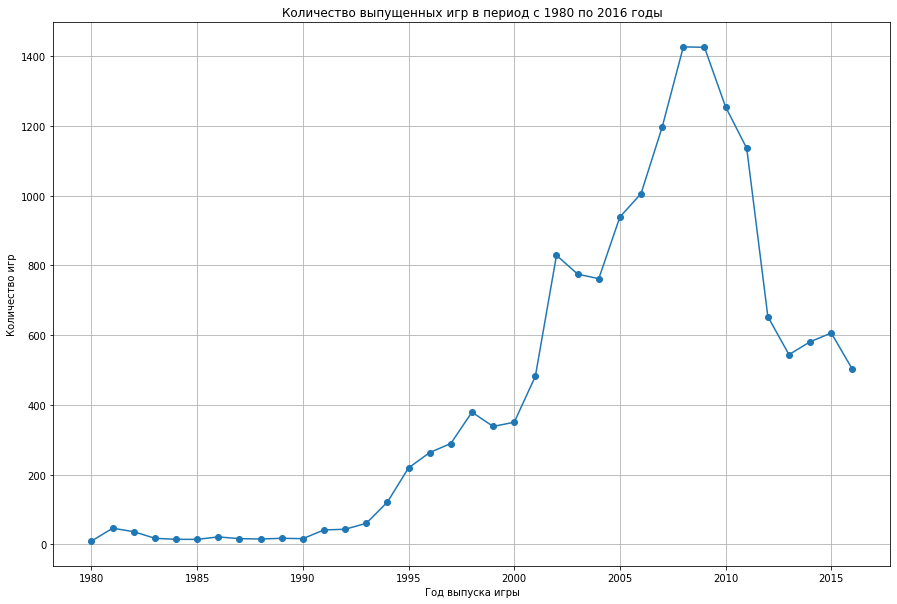

In [27]:
# строим график на основе сводной таблицы
games.pivot_table(index='year_of_release', values='name', aggfunc='count').plot(marker='o', grid=True, figsize=(15, 10),\
legend=False)

plt.title('Количество выпущенных игр в период с 1980 по 2016 годы')
plt.xlabel('Год выпуска игры')
plt.ylabel('Количество игр')
plt.show()

Как видно на графике, количество игр, которые выпускались в период с 1980 по 1990 год, не было значительным и обычно не превышало 20 в год (при этом виден рост выпущенных игр в 1981 и 1982 годах, за которым последовал спад). Количество выпущенных игр вновь стало расти начиная с 1991 года. Начиная с 1993 года, этот рост начал усиливаться и к 1995 году превысил значение 200. Взрывной рост количества игр продолжился до 1998 года (когда это количество приблизилось к 400), после чего вплоть до 2000 года наблюдается спад (что, возможно, связано с Азиатским финансовым кризисом, разразившимся в 1997 году в Юго-Восточной Азии, и ставшим самой серьезной проблемой мировой экономики в конце 90-х, а также экономическим кризисом в России в 1998 году).
С 2000 по 2002 год в отрасли вновь наблюдается стремительный рост (количество выпущенных игр в этот период выросло с 350 до почти 830 в год). Затем мы видим незначительный спад до 2004 года и вновь резкий рост до 2008 (когда количество выпущенных игр превысило 1 400 в год, что стало максимальным значением за рассматриваемый период). После 2009 и до 2013 года мы видим резкое падение (так, в 2013 было выпущено всего около 540 игр. Очевидно, это связано в мировым экономическим кризисом 2008 - 2013 годов), затем незначительный рост с 2013 до 2015. После 2015 также наблюдаем спад. Скорее всего, он связан с тем, что данные за 2016 год неполные.

Анализируя представленные данные, полагаю, что для дальнейшего анализа важен период с 2000 по 2016 год: на него приходится абсолютное большинство выпущенных игр. Кроме того, он является актуальным с учетом прошедшего времени - период с 1980 по 2000 год имеет больше отношения к истории, чем к продажам. Для цели построения прогноза на 2017 год возьмем период с 2014 по 2016 (так мы исключим устаревшие данные и ушедшие с рынка игровые платформы).

**Рассмотрим изменение продаж по платформам**

Для анализа возьмем добавленный нами в 3-м разделе столбец total_sales, содержащий данные о суммарных продажах во всех регионах

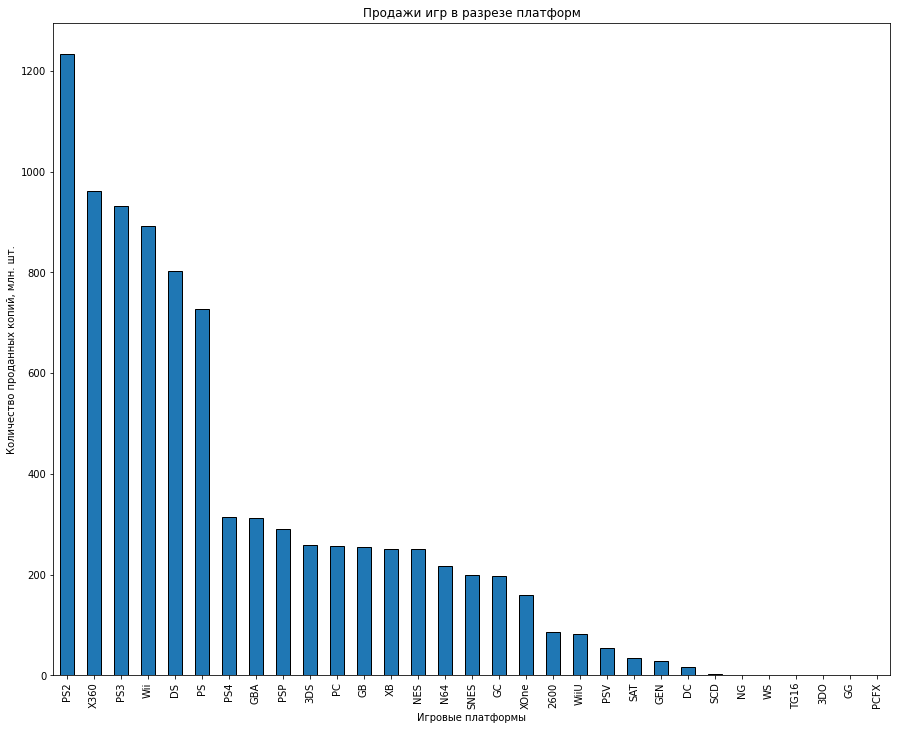

In [28]:
# строим график на основе сводной таблицы
games.pivot_table(index='platform', values='total_sales', aggfunc='sum').sort_values(by='total_sales', ascending=False)\
.plot.bar(figsize=(15, 12), ec='black', legend=False) 
plt.title('Продажи игр в разрезе платформ')
plt.xlabel('Игровые платформы')
plt.ylabel('Количество проданных копий, млн. шт.')
plt.show()

Как видно на графике, большинство проданных копий приходится на платформы PS2, X360, PS3, Wii, DC и PS. Выберем эти 6 платформ с наибольшими суммарными продажами и построим для каждой распределение по годам.

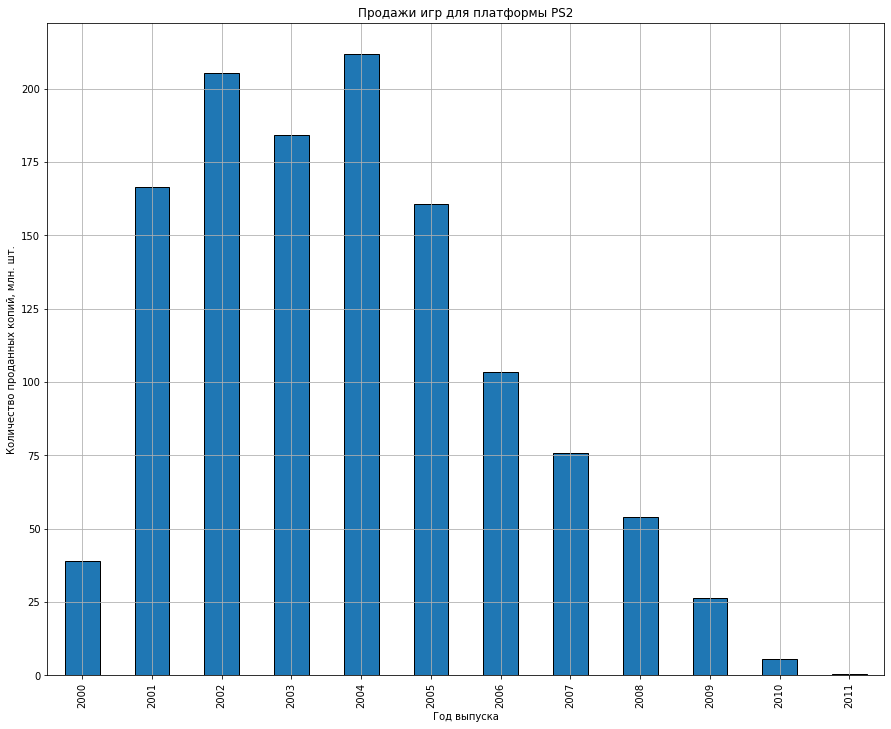

In [29]:
# строим распределение для платформы PS2
games.query('platform in ["PS2"]').pivot_table(index='year_of_release', values='total_sales', aggfunc='sum').\
plot.bar(grid=True, figsize=(15, 12), ec='black', legend=False) 
plt.title('Продажи игр для платформы PS2')
plt.xlabel('Год выпуска')
plt.ylabel('Количество проданных копий, млн. шт.')
plt.show()

Как видим, игры для этой платформы продавались в период с 2000 по 2011 год. При этом наиболее активно продажи шли с 2001 по 2005 год, а пик популярности приходится на 2004 год. В 2010 и в 2011 продажи незначительны. После 2011 - отсутствуют. Таким образом, жизненный цикл платформы составил 11 лет, период активных продаж - 4 года.

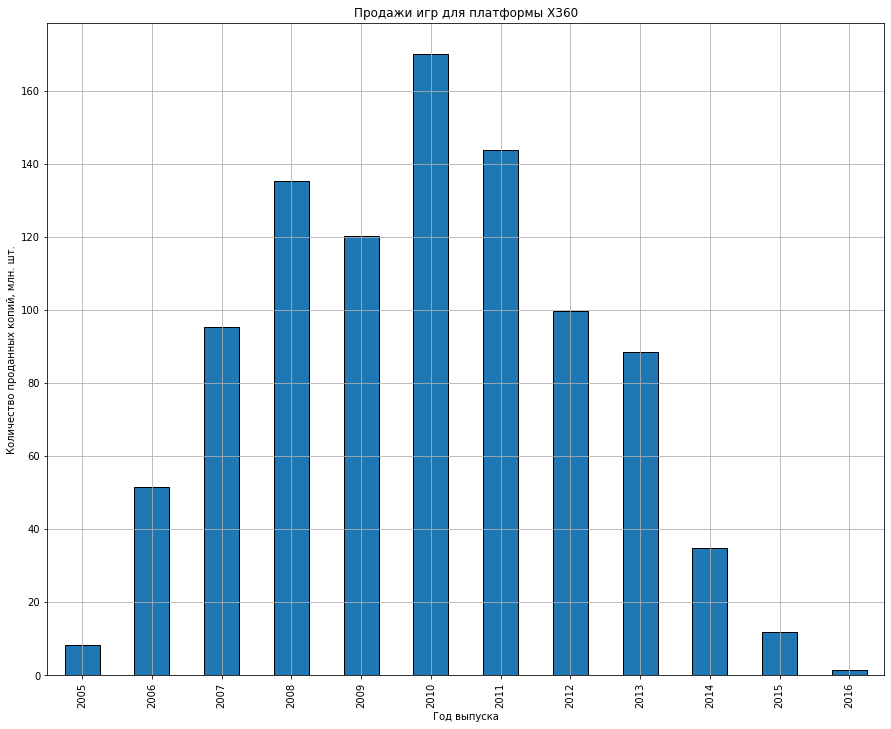

In [30]:
# строим распределение для платформы X360
games.query('platform in ["X360"]').pivot_table(index='year_of_release', values='total_sales', aggfunc='sum').\
plot.bar(grid=True, figsize=(15, 12), ec='black', legend=False) 
plt.title('Продажи игр для платформы X360')
plt.xlabel('Год выпуска')
plt.ylabel('Количество проданных копий, млн. шт.')
plt.show()

Игры для этой платформы продавались в период с 2005 по 2016 год. При этом наиболее активно продажи шли с 2007 по 2013 год, а пик популярности приходится на 2010 год. В 2015 и в 2016 продажи незначительны. После 2016 - отсутствуют. Таким образом, жизненный цикл платформы составил 11 лет, период активных продаж - 6 лет.

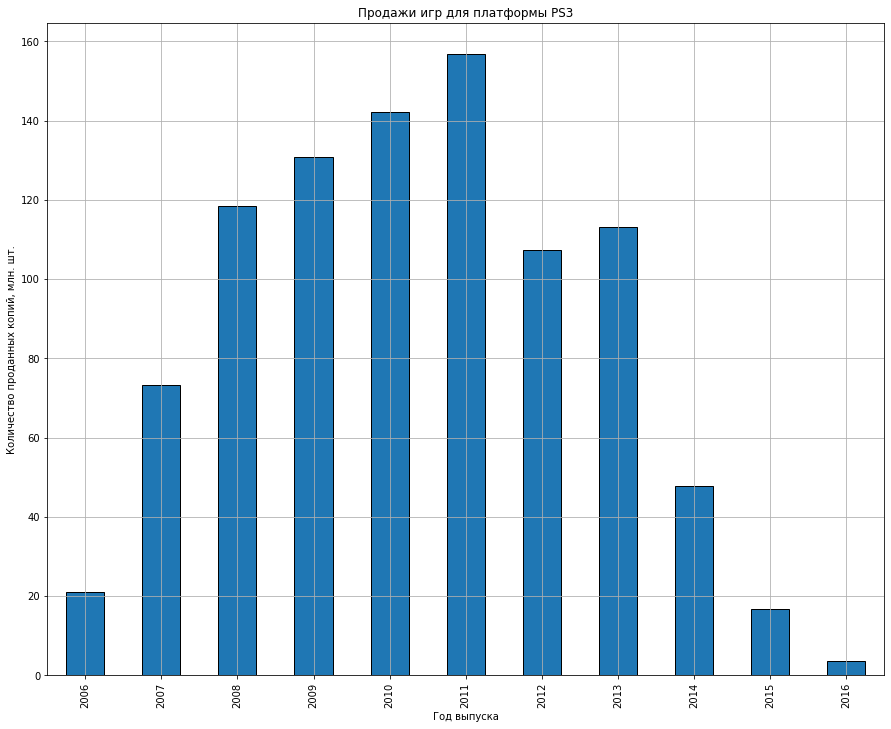

In [31]:
# строим распределение для платформы PS3
games.query('platform in ["PS3"]').pivot_table(index='year_of_release', values='total_sales', aggfunc='sum').\
plot.bar(grid=True, figsize=(15, 12), ec='black', legend=False) 
plt.title('Продажи игр для платформы PS3')
plt.xlabel('Год выпуска')
plt.ylabel('Количество проданных копий, млн. шт.')
plt.show()

Игры для этой платформы продавались в период с 2006 по 2016 год. При этом наиболее активно продажи шли с 2008 по 2013 год, а пик популярности приходится на 2011 год. В 2015 и в 2016 продажи незначительны. После 2016 - отсутствуют. Таким образом, жизненный цикл платформы составил 10 лет, период активных продаж - 5 лет.

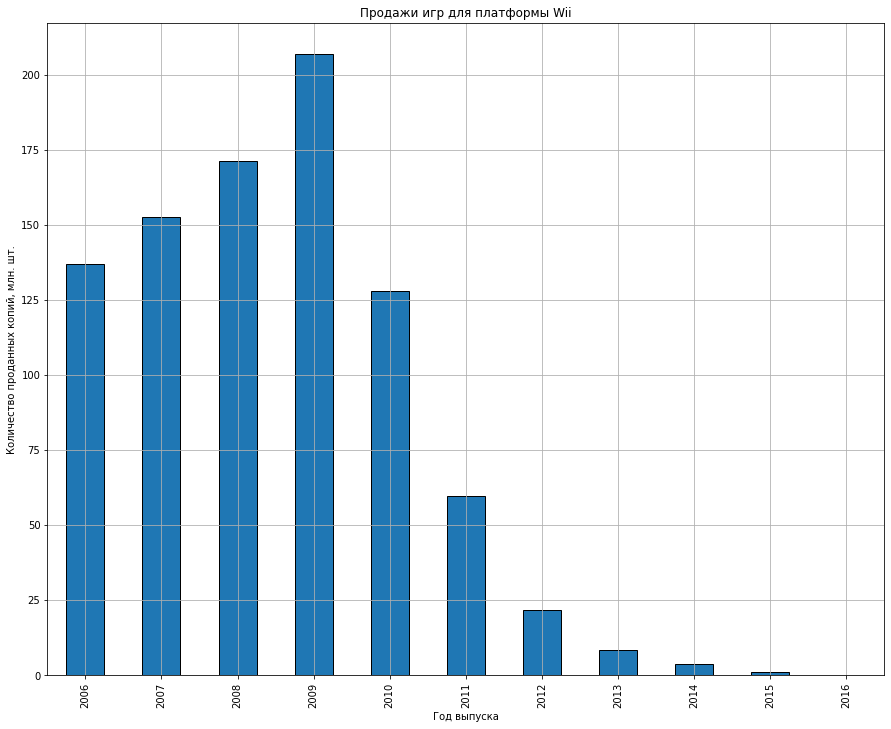

In [32]:
# строим распределение для платформы Wii
games.query('platform in ["Wii"]').pivot_table(index='year_of_release', values='total_sales', aggfunc='sum').\
plot.bar(grid=True, figsize=(15, 12), ec='black', legend=False) 
plt.title('Продажи игр для платформы Wii')
plt.xlabel('Год выпуска')
plt.ylabel('Количество проданных копий, млн. шт.')
plt.show()

Игры для этой платформы продавались в период с 2006 по 2016 год. При этом наиболее активно продажи шли с 2006 по 2010 год, а пик популярности приходится на 2009 год. С 2012 по 2016 продажи незначительны. После 2016 - отсутствуют. Таким образом, жизненный цикл платформы составил 10 лет, период активных продаж - 4 года.

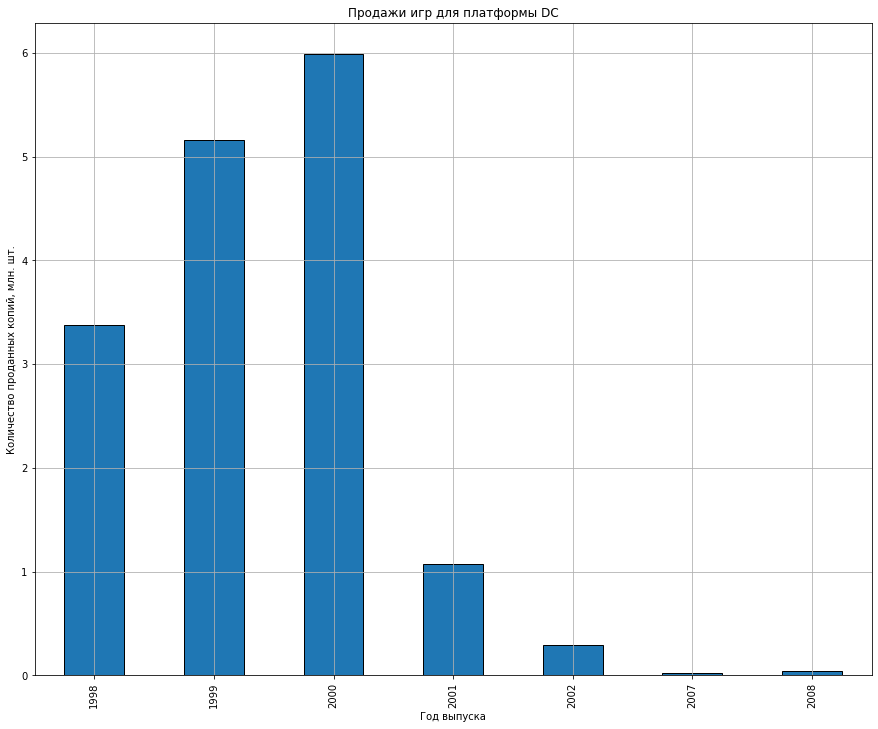

In [33]:
# строим распределение для платформы DC
games.query('platform in ["DC"]').pivot_table(index='year_of_release', values='total_sales', aggfunc='sum').\
plot.bar(grid=True, figsize=(15, 12), ec='black', legend=False) 
plt.title('Продажи игр для платформы DC')
plt.xlabel('Год выпуска')
plt.ylabel('Количество проданных копий, млн. шт.')
plt.show()

Игры для этой платформы продавались в период с 1998 по 2008 год. При этом наиболее активно продажи шли с 1998 по 2000 год, а пик популярности приходится на 2000 год. С 2001 по 2008 продажи незначительны. После 2008 - отсутствуют. Таким образом, жизненный цикл платформы составил 10 лет, период активных продаж - 2 года.

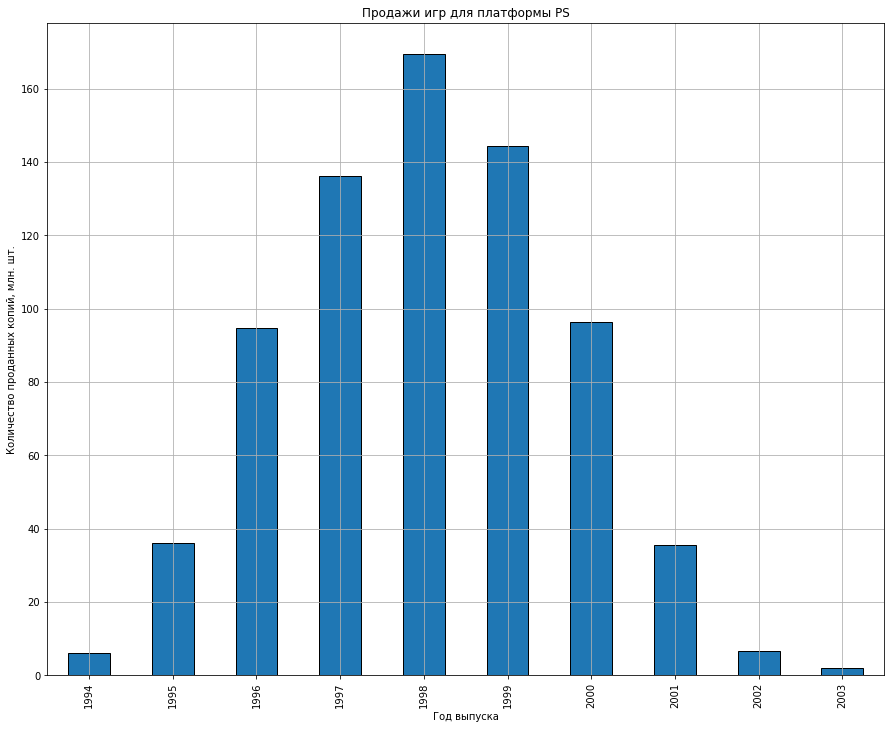

In [34]:
# строим распределение для платформы PS
games.query('platform in ["PS"]').pivot_table(index='year_of_release', values='total_sales', aggfunc='sum').\
plot.bar(grid=True, figsize=(15, 12), ec='black', legend=False) 
plt.title('Продажи игр для платформы PS')
plt.xlabel('Год выпуска')
plt.ylabel('Количество проданных копий, млн. шт.')
plt.show()

Игры для этой платформы продавались в период с 1994 по 2003 год. При этом наиболее активно продажи шли с 1996 по 2000 год, а пик популярности приходится на 1998 год. В 2002 и в 2003 продажи незначительны. После 2003 - отсутствуют. Таким образом, жизненный цикл платформы составил 9 лет, период активных продаж - 4 года.

Таким образом, наши топ-6 платформ появлялись в 1994, 1998, 2005, 2006 (в этом году стартовали продажи 2-х платформ) и 2000, а исчезали в 2003, 2008, 2011, 2016 (в этот год прекратились продажи 3-х платформ). Как мы видели на графиках выше, **средний жизненный цикл отдельной платформы составил примерно 10 лет, а период активных продаж - 4 года.**

Время существования каждой из имеющихся в датафрейме игровых платформ можно увидеть на графике ниже. Безусловным лидером по времени существования является PC, что вполне очевидно

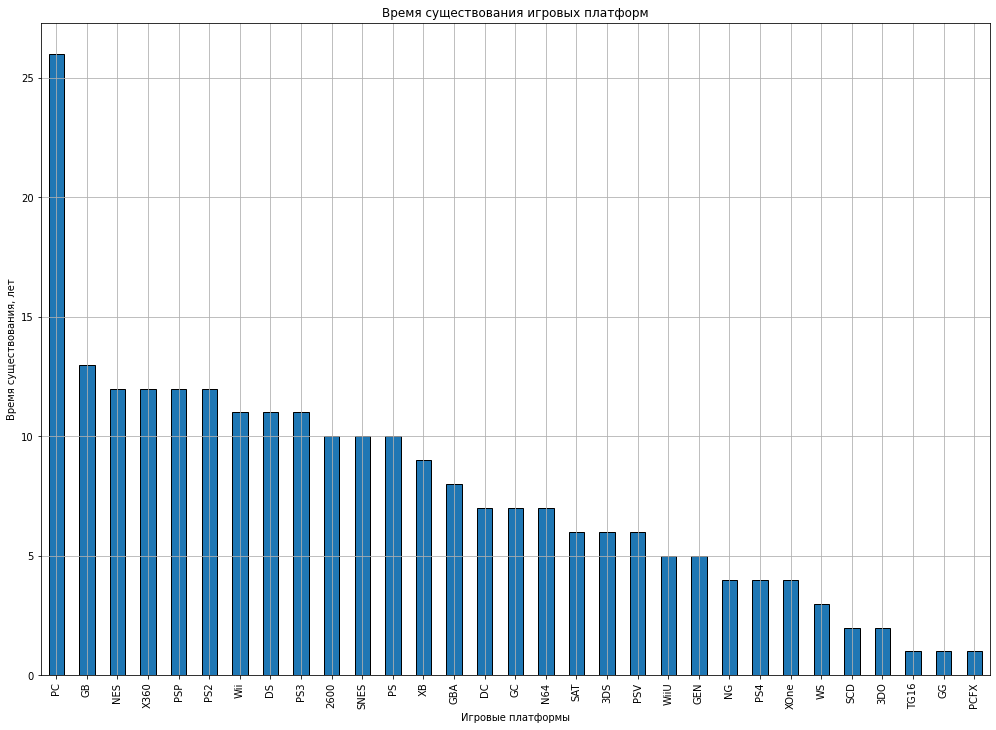

In [35]:
games.loc[:,['year_of_release', 'platform']].drop_duplicates().pivot_table(index=['platform'], values='year_of_release',\
aggfunc='count').sort_values(by='year_of_release', ascending=False).plot.bar(grid=True, figsize=(17, 12), ec='black',\
legend=False)
plt.title('Время существования игровых платформ')
plt.xlabel('Игровые платформы')
plt.ylabel('Время существования, лет')
plt.show()

**Построим прогноз на 2017 год**

Для цели построения прогноза на 2017 год возьмем период с 2014 по 2016 (так мы исключим устаревшие данные и ушедшие с рынка игровые платформы)

In [36]:
# делаем срез данных за интересующий нас период (т.е. с 2014 по 2016)
games_2017 = games.query('year_of_release >= 2014').reset_index(drop=True)
games_2017.head(20)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,0,0.0,absent,14.63
1,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97,8.3,M,12.62
2,Pokemon Omega Ruby/Pokemon Alpha Sapphire,3DS,2014,Role-Playing,4.35,3.49,3.10,0.74,0,0.0,absent,11.68
3,FIFA 16,PS4,2015,Sports,1.12,6.12,0.06,1.28,82,4.3,E,8.58
4,Star Wars Battlefront (2015),PS4,2015,Shooter,2.99,3.49,0.22,1.28,0,0.0,absent,7.98
5,Call of Duty: Advanced Warfare,PS4,2014,Shooter,2.81,3.48,0.14,1.23,83,5.7,M,7.66
6,FIFA 17,PS4,2016,Sports,0.66,5.75,0.08,1.11,85,5.0,E,7.60
7,Super Smash Bros. for Wii U and 3DS,3DS,2014,Fighting,3.27,1.37,2.43,0.48,0,0.0,absent,7.55
8,Call of Duty: Black Ops 3,XOne,2015,Shooter,4.59,2.11,0.01,0.68,0,0.0,absent,7.39
9,Fallout 4,PS4,2015,Role-Playing,2.53,3.27,0.24,1.13,87,6.5,M,7.17


In [37]:
# выведем лидеров среди платформ по числу продаж за период с 2014 по 2016
print(games_2017.pivot_table(index='platform', values='total_sales', aggfunc='sum').sort_values\
(by='total_sales', ascending=False))

          total_sales
platform             
PS4            288.15
XOne           140.36
3DS             86.68
PS3             68.18
X360            48.22
WiiU            42.98
PC              27.05
PSV             22.40
Wii              5.07
PSP              0.36


Как мы видим, бесспорно лидируют по количеству продаж 2 платформы: PS4 и XOne. Посмотрим на графиках объемы продаж игр для этих платформ за интересующий нас период

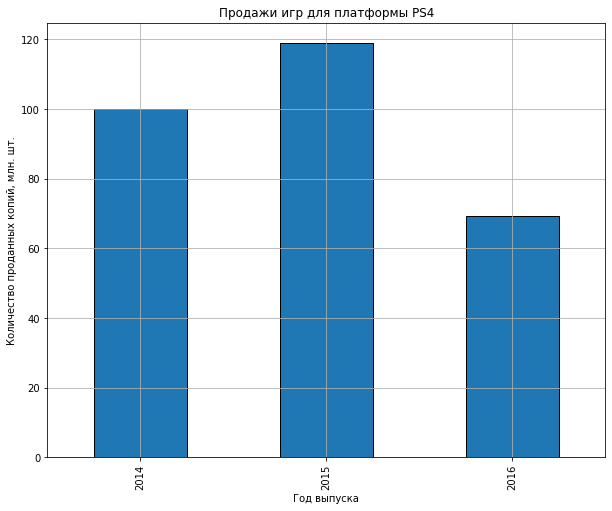

In [38]:
# строим график для платформы PS4
games_2017.query('platform in ["PS4"]').pivot_table(index='year_of_release', values='total_sales', aggfunc='sum').\
plot.bar(grid=True, figsize=(10, 8), ec='black', legend=False) 
plt.title('Продажи игр для платформы PS4')
plt.xlabel('Год выпуска')
plt.ylabel('Количество проданных копий, млн. шт.')
plt.show()

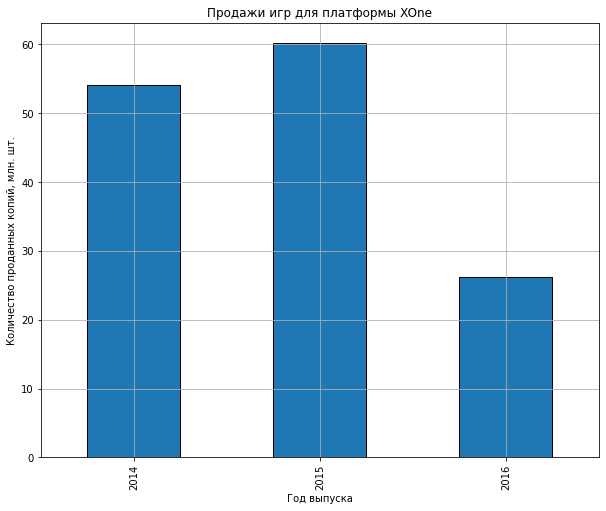

In [39]:
# строим график для платформы XOne
games_2017.query('platform in ["XOne"]').pivot_table(index='year_of_release', values='total_sales', aggfunc='sum').\
plot.bar(grid=True, figsize=(10, 8), ec='black', legend=False) 
plt.title('Продажи игр для платформы XOne')
plt.xlabel('Год выпуска')
plt.ylabel('Количество проданных копий, млн. шт.')
plt.show()

При сравнении графиков видим, что за период с 2014 по 2016 обе платформы показали похожую динамику продаж: рост продаж с 2014 по 2015, пик в 2015 году и затем спад. Но при этом **объем продаж игр для платформы PS4 существенно (примерно вдвое) превышает объем продаж XOne: в 2014 году это 100 млн. копий против 55 млн. копий, в 2015 году - почти 120 млн. копий против 60 млн. копий и в 2016 году - 70 млн. копий против 26 млн. копий. Таким образом, платформа PS4 является потенциально более прибыльной.**

Это наглядно видно на графике ниже.

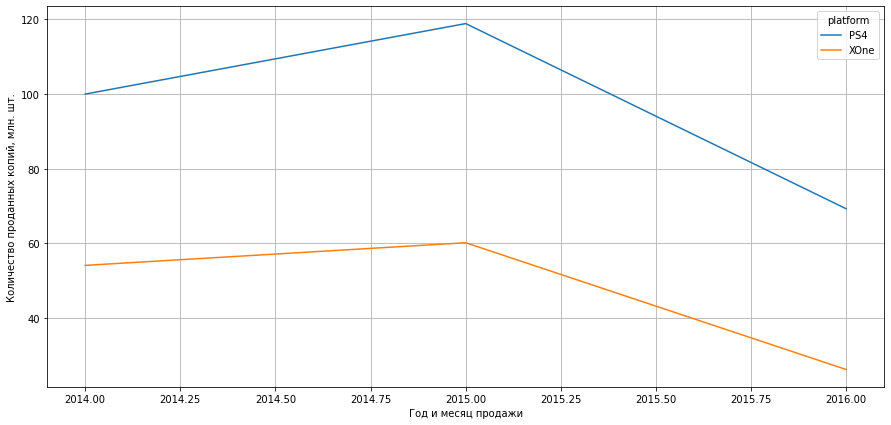

In [40]:
games_2017.query('platform in ["PS4", "XOne"]').pivot_table(index='year_of_release', columns = 'platform',\
values='total_sales', aggfunc='sum').plot(grid=True, figsize=(15, 7))
# меняем наименование горизонтальной линии ('X')
plt.xlabel('Год и месяц продажи')
# меняем наименование вертикальной линии ('Y')
plt.ylabel('Количество проданных копий, млн. шт.')
plt.show()

**Построим график «ящик с усами» по глобальным продажам игр в разбивке по платформам**

In [41]:
# посмотрим распределение по столбцу total_sales датафрейма games_2017
games_2017['total_sales'].describe()

count    1689.000000
mean        0.431883
std         1.056109
min         0.010000
25%         0.030000
50%         0.100000
75%         0.350000
max        14.630000
Name: total_sales, dtype: float64

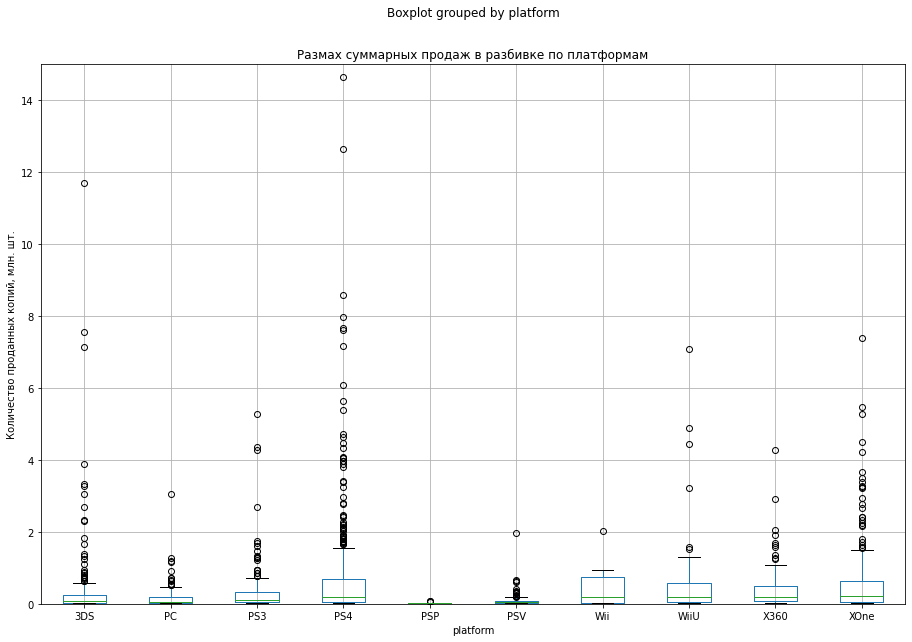

In [42]:
games_2017.boxplot(column='total_sales', by='platform', figsize=(15,10))
plt.title('Размах суммарных продаж в разбивке по платформам')
plt.ylim(0, 15)
plt.ylabel('Количество проданных копий, млн. шт.')
plt.show()

Из графика мы видим, что ориентировочные границы нормального размаха суммарных продаж для каждой из платформ не превышают значения 2 млн. копий. Более высокие значения отображены как выбросы. Там, где их количество невелико, они представлены отдельными точками. Там, где таких выбросов много, они сливаются в линию. В целом по столбцу total_sales датафрейма games_2017 (т.е. с информацией за интересующий нас период: с 2014 по 2016) медиана составляет 0,10 млн. копий, среднее - 0,43 млн. копий.
Наличие выбросов, скорее всего, связано с тем, что в рамках каждой платформы есть наиболее успешные игры с большим объемом продаж. 

Для интересующих нас платформ PS4 и XOne границы нормального размаха совпадают: от 0 до 1,7 млн. копий.

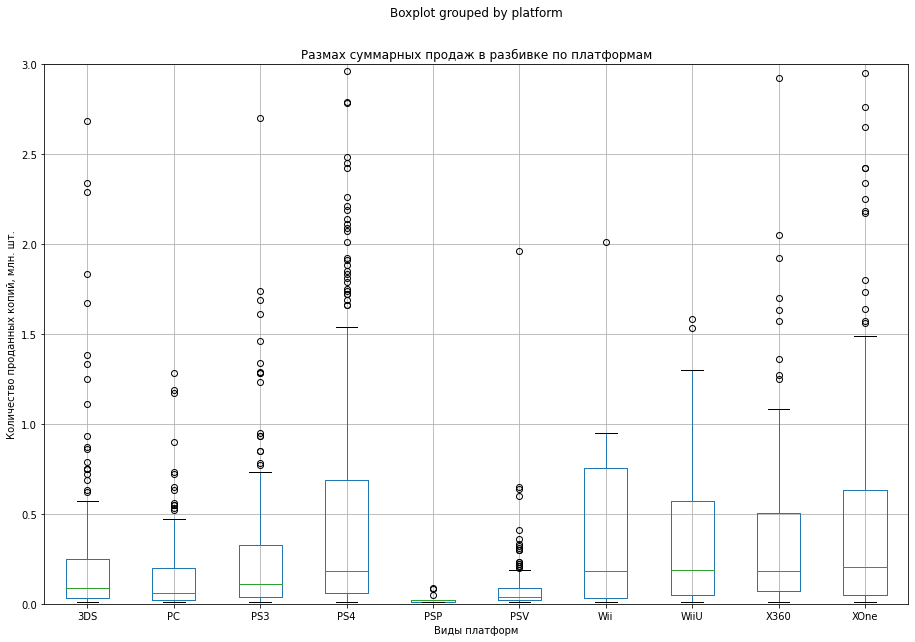

In [43]:
games_2017.boxplot(column='total_sales', by='platform', figsize=(15,10))
plt.title('Размах суммарных продаж в разбивке по платформам')
plt.ylim(0, 3)
plt.ylabel('Количество проданных копий, млн. шт.')
plt.xlabel('Виды платформ')
plt.show()

**Посмотрим как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков**

Построим диаграмму рассеяния и посчитаем корреляцию между отзывами и продажами.

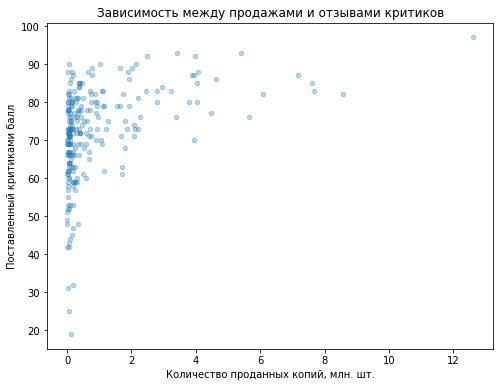

In [44]:
# построим диаграмму рассеяния для платформы PS4 
games_2017.query('platform in ["PS4"] and critic_score > 0').plot(x='total_sales', y ='critic_score', kind ='scatter',\
figsize=(8, 6), legend=True, alpha = 0.3)

plt.title('Зависимость между продажами и отзывами критиков')
plt.xlabel('Количество проданных копий, млн. шт.')
plt.ylabel('Поставленный критиками балл')
plt.show()

In [45]:
# рассчитаем коэффициент корреляции
games_2017.query('platform in ["PS4"] and critic_score > 0')['total_sales'].corr(games_2017.query('platform in ["PS4"] \
and critic_score > 0')['critic_score'])

0.40266141068104083

Как видим, для для платформы PS4 имеется зависимость между объемом продаж и отзывами критиков: с ростом оценки критиков (т.е. с увеличением поставленного балла) растут и продажи, но эта зависимость выражена не сильно, что подтверждается значением коэффициента корреляции (0,4)

Теперь посмотрим как влияют на продажи игр той же платформы отзывы пользователей

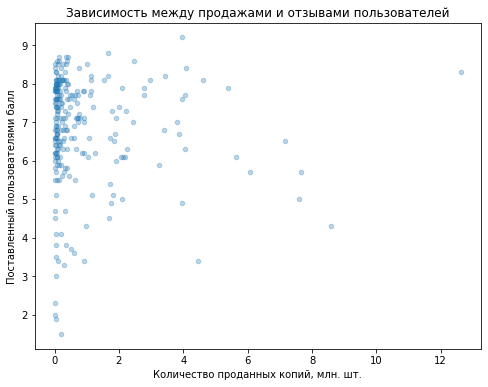

In [46]:
# построим диаграмму рассеяния для платформы PS4 
games_2017.query('platform in ["PS4"] and user_score > 0').plot(x='total_sales', y ='user_score', kind ='scatter',\
figsize=(8, 6), legend=True, alpha = 0.3)

plt.title('Зависимость между продажами и отзывами пользователей')
plt.xlabel('Количество проданных копий, млн. шт.')
plt.ylabel('Поставленный пользователями балл')
plt.show()

In [47]:
# рассчитаем коэффициент корреляции
games_2017.query('platform in ["PS4"] and user_score > 0')['total_sales'].corr(games_2017.query('platform in ["PS4"] \
and user_score > 0')['user_score'])

-0.040131589472697356

Видим, что для для платформы PS4 зависимость между объемом продаж и отзывами пользователей отсутствует.

Теперь посмотрим те же завистимости для второй выбранной нами платформы - XOne

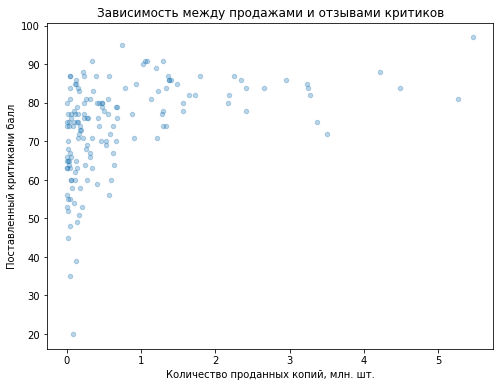

In [48]:
# построим диаграмму рассеяния для платформы XOne 
games_2017.query('platform in ["XOne"] and critic_score > 0').plot(x='total_sales', y ='critic_score', kind ='scatter',\
figsize=(8, 6), legend=True, alpha = 0.3)

plt.title('Зависимость между продажами и отзывами критиков')
plt.xlabel('Количество проданных копий, млн. шт.')
plt.ylabel('Поставленный критиками балл')
plt.show()

In [49]:
# рассчитаем коэффициент корреляции
games_2017.query('platform in ["XOne"] and critic_score > 0')['total_sales'].corr(games_2017.query('platform in ["XOne"] \
and critic_score > 0')['critic_score'])

0.42867694370333226

Т.е. зависимость аналогична той, которую мы наблюдали для платформы PS4: с ростом оценки критиков (т.е. с увеличением поставленного балла) растут и продажи. Также как и в предыдущем случае, зависимость выражена не сильно: коэффициенты корреляции 0,40 и 0,43.

Теперь посмотрим как влияют на продажи игр отзывы пользователей

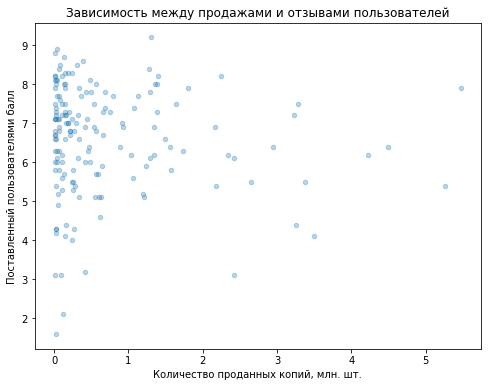

In [50]:
# построим диаграмму рассеяния для платформы XOne 
games_2017.query('platform in ["XOne"] and user_score > 0').plot(x='total_sales', y ='user_score', kind ='scatter',\
figsize=(8, 6), legend=True, alpha = 0.3)

plt.title('Зависимость между продажами и отзывами пользователей')
plt.xlabel('Количество проданных копий, млн. шт.')
plt.ylabel('Поставленный пользователями балл')
plt.show()

In [51]:
# рассчитаем коэффициент корреляции
games_2017.query('platform in ["XOne"] and user_score > 0')['total_sales'].corr(games_2017.query('platform in ["XOne"] \
and user_score > 0')['user_score'])

-0.0703839280647581

Снова мы имеем похожую с платформой PS4 зависимость:

- с ростом оценки критиков (т.е. с увеличением поставленного балла) растут и продажи. Но зависимость выражена слабо: коэффициент корреляции для платформы PS4 составляет 0,40, а для платформы XOne: 0,43 

- зависимость продаж от оценки пользователей отсутствует для обеих платформ

Теперь посмотрим на зависимость от оценок критиков и от оценок пользователей по всем платформам.

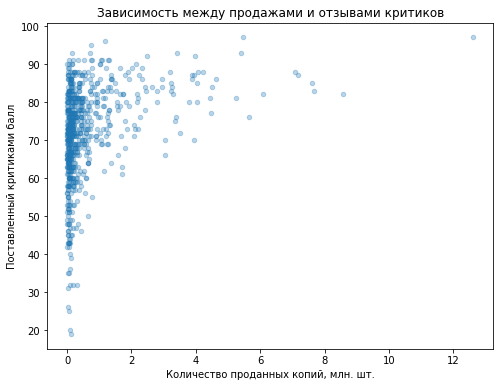

In [52]:
# построим диаграмму для оценок критиков по всем платформам 
games_2017.query('critic_score > 0').plot(x='total_sales', y ='critic_score', kind ='scatter',\
figsize=(8, 6), legend=True, alpha = 0.3)

plt.title('Зависимость между продажами и отзывами критиков')
plt.xlabel('Количество проданных копий, млн. шт.')
plt.ylabel('Поставленный критиками балл')
plt.show()

In [53]:
# рассчитаем коэффициент корреляции
games_2017.query('critic_score > 0')['total_sales'].corr(games_2017.query('critic_score > 0')['critic_score'])

0.328105086966363

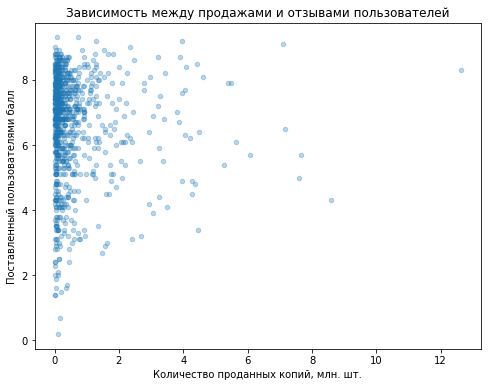

In [54]:
# построим диаграмму для оценок пользователей по всем платформам 
games_2017.query('user_score > 0').plot(x='total_sales', y ='user_score', kind ='scatter',\
figsize=(8, 6), legend=True, alpha = 0.3)

plt.title('Зависимость между продажами и отзывами пользователей')
plt.xlabel('Количество проданных копий, млн. шт.')
plt.ylabel('Поставленный пользователями балл')
plt.show()

In [55]:
# рассчитаем коэффициент корреляции
games_2017.query('user_score > 0')['total_sales'].corr(games_2017.query('user_score > 0')['user_score'])

-0.013070305002484585

Таким образом, рассмотрев влияние на продажи отзывов критиков и отзывов пользователей по всем платформам, мы получили примерно те же результаты, что и для PS4 и XOne в отдельности:

**1) с ростом оценки критиков (т.е. с увеличением поставленного балла) растут и продажи, но зависимость выражена слабо**

**2) зависимость продаж от оценки пользователей отсутствует**


**Посмотрим на общее распределение игр по жанрам**

Выведем на экран список жанров представленных в датафрейме игр, отсортированный по количеству проданных копий в порядке убывания. Т.е. наверху мы увидим наиболее "прибыльные" жанры. При этом стоит сразу отметить, что речь идет именно о количестве проданных копий, а не о выручке или прибыли.

In [56]:
games_2017.pivot_table(index='genre', values='total_sales', aggfunc='median').sort_values('total_sales', ascending=False)

,total_sales
genre,
Shooter,0.515
Sports,0.180
Platform,0.140
Fighting,0.125
Role-Playing,0.110
Simulation,0.100
Action,0.090
Misc,0.090
Racing,0.090


In [57]:
games_2017.pivot_table(index='genre', values='total_sales', aggfunc='sum').sort_values('total_sales', ascending=False)

,total_sales
genre,
Action,199.36
Shooter,170.94
Sports,109.48
Role-Playing,101.44
Misc,37.55
Fighting,28.22
Racing,27.52
Platform,18.09
Adventure,17.55


Таким образом, в первом случае (когда подсчет идет по медиане) тройка лидеров выглядит так: Shooter, Sports, Platform. Хуже всего продаются Strategy, Puzzle и Adventure.
При подсчете по общей сумме проданных копий в тройку лидеров вошли: Action, Shooter, Sports. Хуже всего продаются Simulation, Strategy, Puzzle.

**Т.е. можем выделить самые "прибыльные" жанры: это Shooter, Sports, Action. И жанры с низкими продажами: Strategy, Puzzle, Adventure.** При этом необходимо учесть, что *мы не оцениваем здесь ни выручку, ни прибыль, которые приносит продажа игр разных жанров (т.к. у нас отсутствуют данные по стоимости каждой отдельной игры и расходах на ее создание, маркетинг, производство).*

Доли отдельных жанров в продаже игр можно наглядно увидеть на круговой диаграмме.

Text(0.5, 1.0, 'Продажи отдельных жанров компьютерных игр')

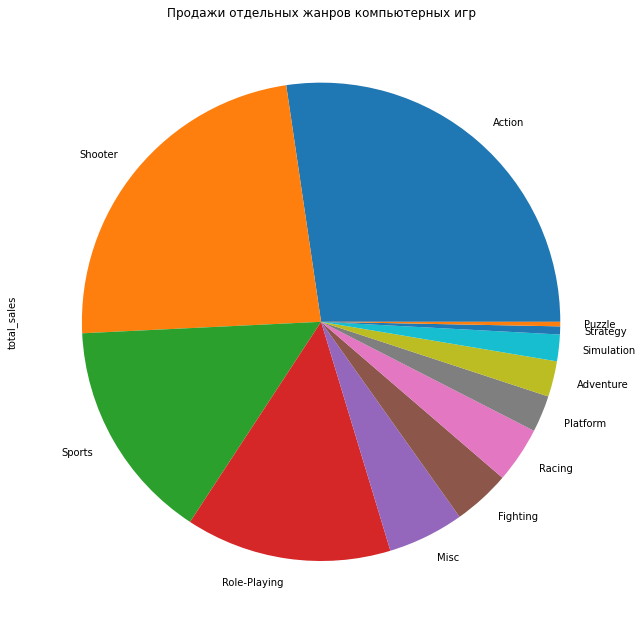

In [58]:
games_2017.pivot_table(index='genre', values='total_sales', aggfunc='sum').sort_values('total_sales', ascending=False).\
plot(kind ='pie', figsize=(11, 11), subplots=True, legend=False)

plt.title('Продажи отдельных жанров компьютерных игр')

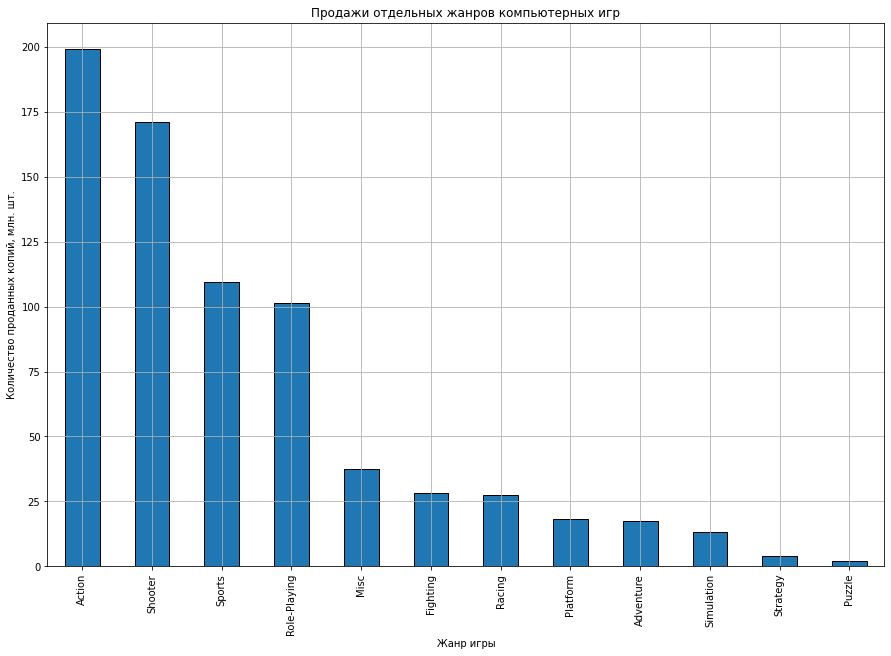

In [59]:
# строим диаграмму
games_2017.pivot_table(index='genre', values='total_sales', aggfunc='sum').sort_values('total_sales', ascending=False).\
plot.bar(grid=True, figsize=(15, 10), ec='black', legend=False) 

plt.title('Продажи отдельных жанров компьютерных игр')
plt.xlabel('Жанр игры')
plt.ylabel('Количество проданных копий, млн. шт.')
plt.show()

### Составим портрет пользователя каждого региона

**Начнем с Северной Америки**. Определим:

- наиболее популярные платформы
- наиболее популярные жанры игр
- как продаются игры с различным рейтингом ESRB

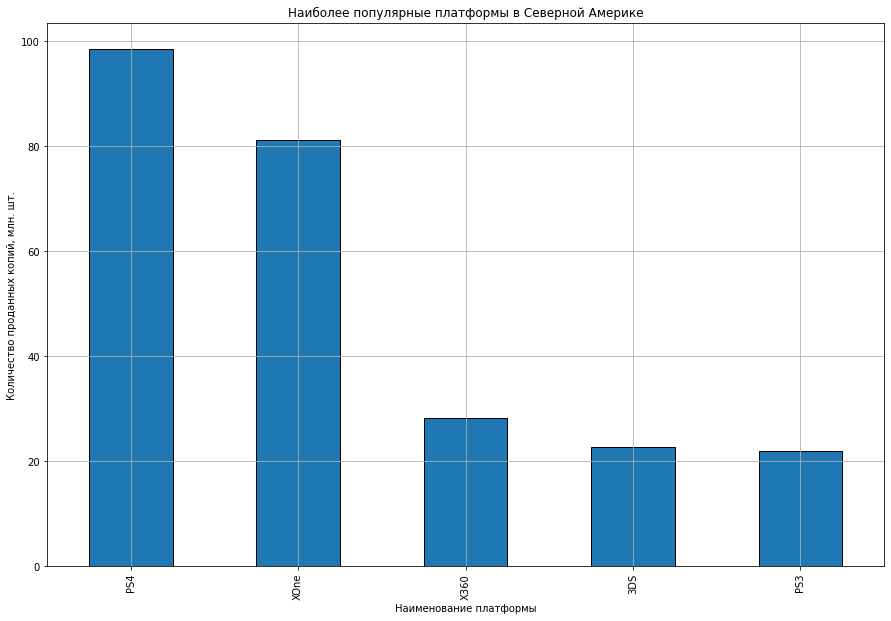

In [60]:
# строим график для платформ
games_2017.pivot_table(index='platform', values='na_sales', aggfunc='sum').sort_values(by='na_sales', ascending=False).head(5).\
plot.bar(grid=True, figsize=(15, 10), ec='black', legend=False) 
plt.title('Наиболее популярные платформы в Северной Америке')
plt.xlabel('Наименование платформы')
plt.ylabel('Количество проданных копий, млн. шт.')
plt.show()

Как видим, максимум проданных копий игр приходится на PS4 и XOne (при этом PS4 более популярна). Продажи игр для других платформ существенно ниже

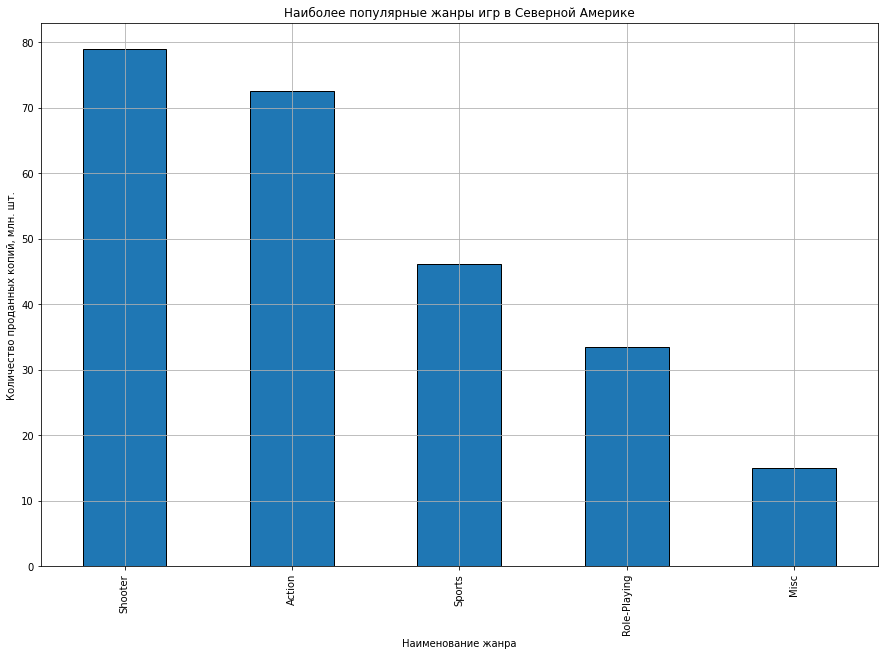

In [61]:
# строим распределение по жанрам игр
games_2017.pivot_table(index='genre', values='na_sales', aggfunc='sum').sort_values(by='na_sales', ascending=False).head(5).\
plot.bar(grid=True, figsize=(15, 10), ec='black', legend=False) 
plt.title('Наиболее популярные жанры игр в Северной Америке')
plt.xlabel('Наименование жанра')
plt.ylabel('Количество проданных копий, млн. шт.')
plt.show()

Таким образом, среди пользователей Северной Америки наиболее популярны Shooter и Action (при этом максимум симпатий приходится на Shooter)

Text(0.5, 1.0, 'Продажи игр с различным рейтингом ESRB')

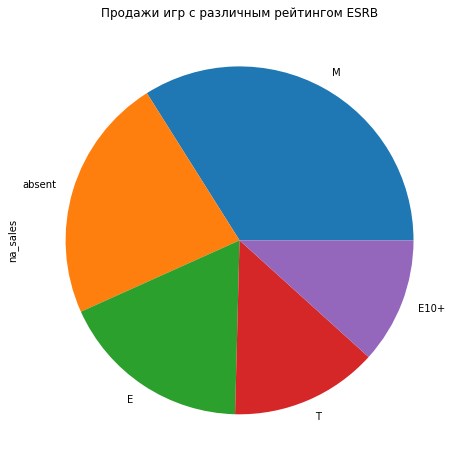

In [62]:
# строим круговую диаграмму
games_2017.pivot_table(index='rating', values='na_sales', aggfunc='sum').sort_values('na_sales', ascending=False).\
plot(kind ='pie', figsize=(8, 8), subplots=True, legend=False)

plt.title('Продажи игр с различным рейтингом ESRB')

Как видим, почти половину круга занимают игры с рейтингом М (т.е. «Mature» — «От 17 лет»: когда материалы игры не подходят для возрастной категории младше 17 лет. Проекты с данным рейтингом могут содержать достаточно жестокое насилие, большое количество крови с расчленением, непристойные сексуальные сцены или грубую ненормативную лексику, нежелательную для младшей аудитории.

Вторые по популярности игры с рейтиргом Е (т.е. «Everyone» — «Для всех»: содержание вполне подходит для возрастной категории старше 6 лет; такие игры могут понравиться и взрослым. Игры с этим рейтингом могут содержать минимальное насилие, в основном «мультяшного» характера)

Таким образом, наиболее характерно для пользователей из Северной Америки следующее:

- игровая платформа PS4 или XOne
- жанры игр Shooter и Action
- игры категории М (от 17 лет) или Е (для возрастной категории старше 6 лет)


**Перейдем к пользователям из Европы**

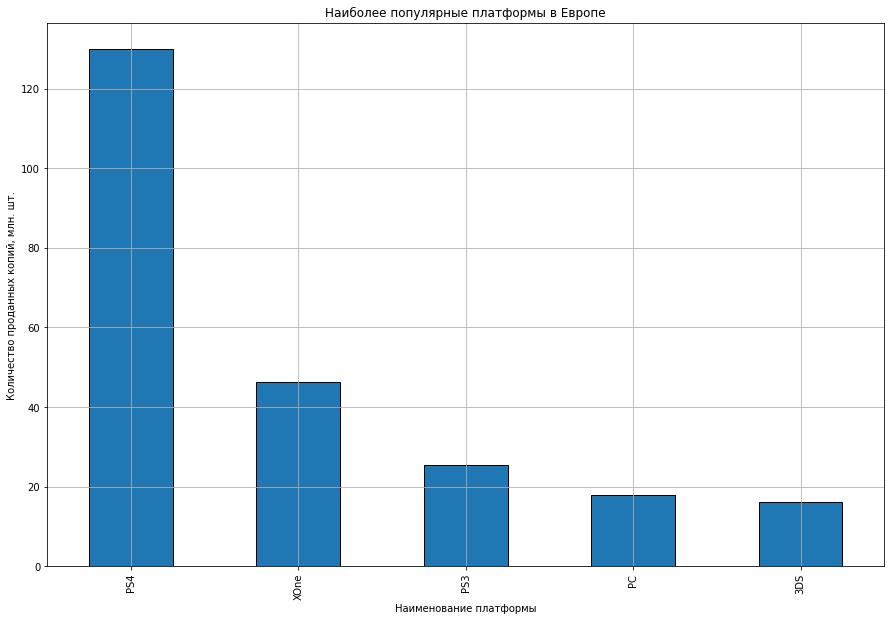

In [63]:
# строим график для платформ
games_2017.pivot_table(index='platform', values='eu_sales', aggfunc='sum').sort_values(by='eu_sales', ascending=False).head(5).\
plot.bar(grid=True, figsize=(15, 10), ec='black', legend=False) 
plt.title('Наиболее популярные платформы в Европе')
plt.xlabel('Наименование платформы')
plt.ylabel('Количество проданных копий, млн. шт.')
plt.show()

Как видим, по сравнению с Северной Америкой ситуация несколько иная: абсолютное большинство пользуется платформой PS4. Доля XOne и других платформ существенно ниже

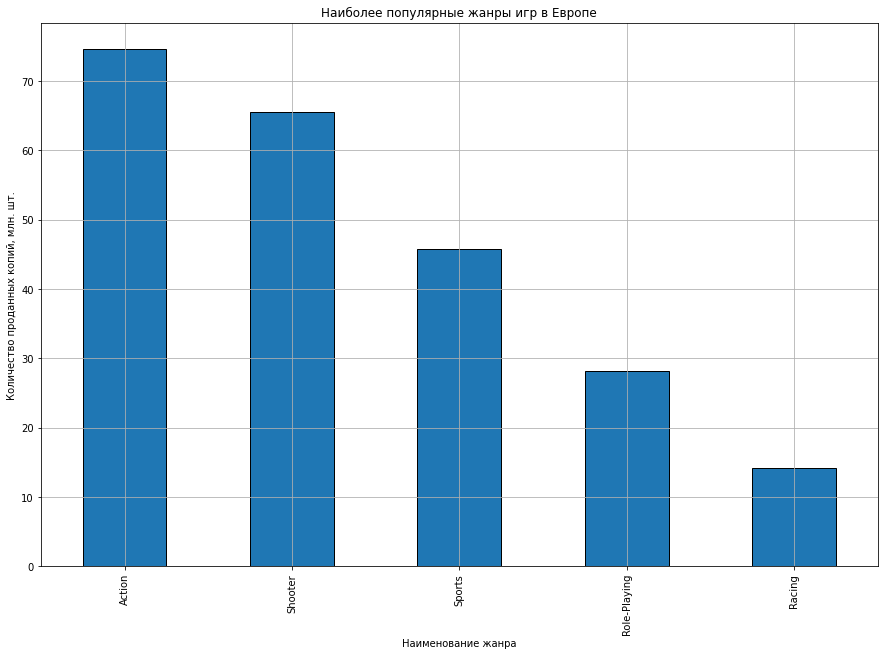

In [64]:
# строим распределение по жанрам игр
games_2017.pivot_table(index='genre', values='eu_sales', aggfunc='sum').sort_values(by='eu_sales', ascending=False).head(5).\
plot.bar(grid=True, figsize=(15, 10), ec='black', legend=False) 
plt.title('Наиболее популярные жанры игр в Европе')
plt.xlabel('Наименование жанра')
plt.ylabel('Количество проданных копий, млн. шт.')
plt.show()

По игровым предпочтением также наблюдается схожая с Северной Америкой тенденция: наиболее популярны Shooter и Action (только при этом максимум симпатий приходится на Action)

Text(0.5, 1.0, 'Продажи игр с различным рейтингом ESRB')

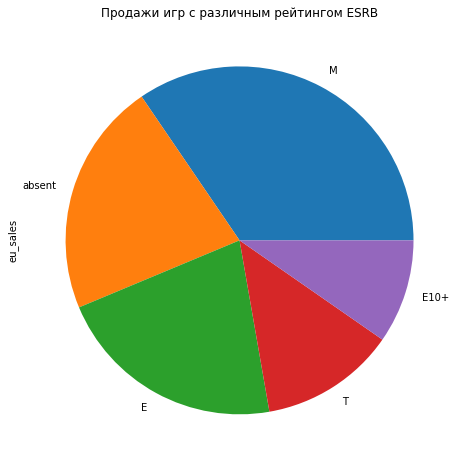

In [65]:
# строим круговую диаграмму
games_2017.pivot_table(index='rating', values='eu_sales', aggfunc='sum').sort_values('eu_sales', ascending=False).\
plot(kind ='pie', figsize=(8, 8), subplots=True, legend=False)

plt.title('Продажи игр с различным рейтингом ESRB')

Здесь ситуация аналогична той, которую мы видели в Северной Америке: почти половину круга занимают игры с рейтингом М (т.е. «Mature» — «От 17 лет»: когда материалы игры не подходят для возрастной категории младше 17 лет. Проекты с данным рейтингом могут содержать достаточно жестокое насилие, большое количество крови с расчленением, непристойные сексуальные сцены или грубую ненормативную лексику, нежелательную для младшей аудитории.

Вторые по популярности игры с рейтиргом Е (т.е. «Everyone» — «Для всех»: содержание вполне подходит для возрастной категории старше 6 лет; такие игры могут понравиться и взрослым. Игры с этим рейтингом могут содержать минимальное насилие, в основном «мультяшного» характера)

Таким образом, наиболее характерно для пользователей из Европы следующее:

- игровая платформа PS4
- жанры игр Shooter и Action
- игры категории М (от 17 лет) или Е (для возрастной категории старше 6 лет)

**Перейдем к пользователям из Японии**

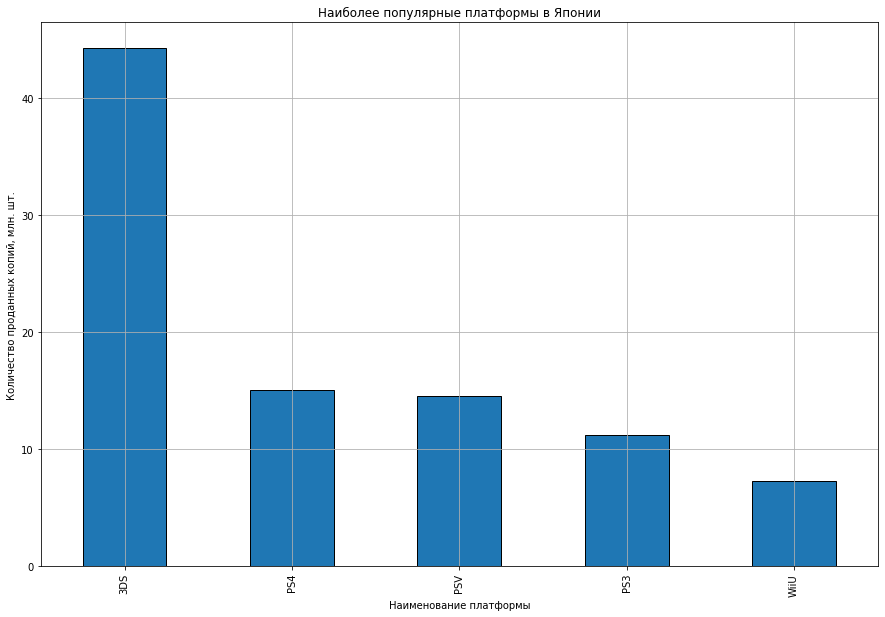

In [66]:
# строим график для платформ
games_2017.pivot_table(index='platform', values='jp_sales', aggfunc='sum').sort_values(by='jp_sales', ascending=False).head(5).\
plot.bar(grid=True, figsize=(15, 10), ec='black', legend=False) 
plt.title('Наиболее популярные платформы в Японии')
plt.xlabel('Наименование платформы')
plt.ylabel('Количество проданных копий, млн. шт.')
plt.show()

Как видим, предпочтения пользователей из Японии отличаются от тех, что мы видели в Севергой Америке и Европе. Абсолютное большинство японских пользователей предпочитают платформу 3DS. Иные платформы распространены существенно реже.

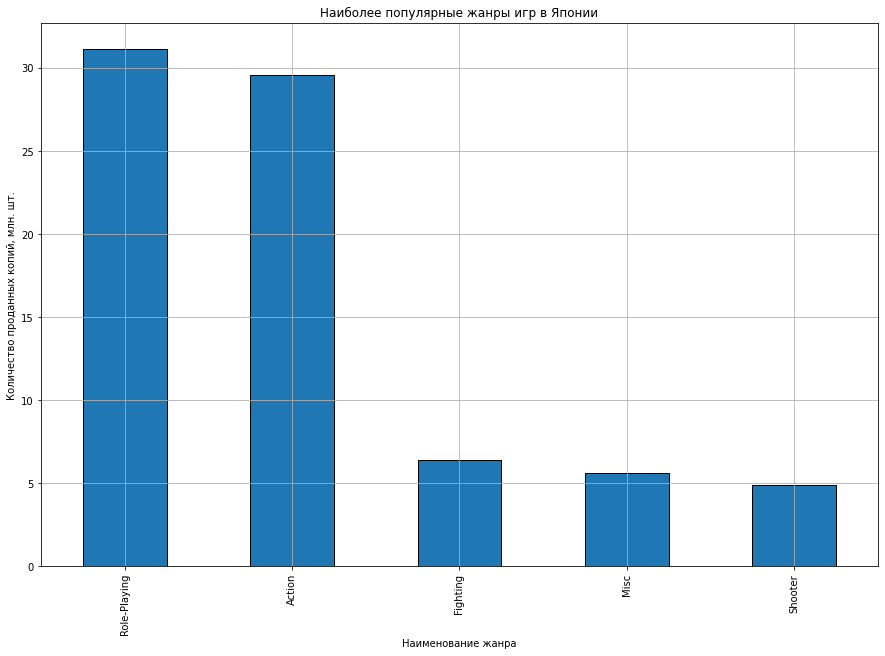

In [67]:
# строим распределение по жанрам игр
games_2017.pivot_table(index='genre', values='jp_sales', aggfunc='sum').sort_values(by='jp_sales', ascending=False).head(5).\
plot.bar(grid=True, figsize=(15, 10), ec='black', legend=False) 
plt.title('Наиболее популярные жанры игр в Японии')
plt.xlabel('Наименование жанра')
plt.ylabel('Количество проданных копий, млн. шт.')
plt.show()

По жанрам также имеется отличие от Европы и Северной Америки: японские пользователи предпочитают Role-Playing и Action (причем наибольшие симпатии именно у Role-Playing)

Text(0.5, 1.0, 'Продажи игр с различным рейтингом ESRB')

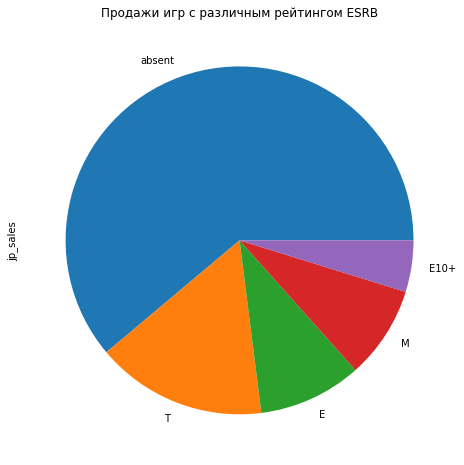

In [68]:
# строим круговую диаграмму
games_2017.pivot_table(index='rating', values='jp_sales', aggfunc='sum').sort_values('jp_sales', ascending=False).\
plot(kind ='pie', figsize=(8, 8), subplots=True, legend=False)

plt.title('Продажи игр с различным рейтингом ESRB')

Как видим, наиболее популярны в Японии игры с рейтингом Т (т.е. «Teen» — «Подросткам 13—19 лет»: игра подходит для подростков старше 13 лет. Проекты из данной категории могут содержать насилие, непристойные сцены, грубый юмор, в меру откровенное сексуальное содержимое, кровь или нечастое использование ненормативной лексики). На втором месте игры категории Е (т.е. «Everyone» — «Для всех»: содержание вполне подходит для возрастной категории старше 6 лет; такие игры могут понравиться и взрослым. Игры с этим рейтингом могут содержать минимальное насилие, в основном «мультяшного» характера)

Таким образом, наиболее характерно для пользователей из Японии следующее:

- игровая платформа 3DS
- жанры игр Role-Playing и Action
- игры категории Т (для подростков 13 - 19 лет) и Е (для категории старше 6 лет)

**Перейдем к пользователям из других стран** (они выведены в группу other_sales)

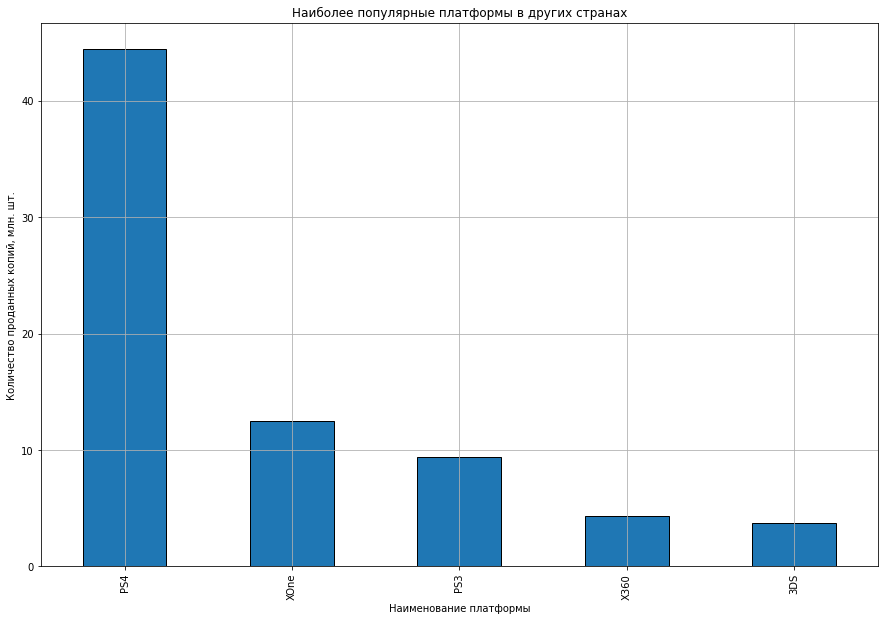

In [69]:
# строим график для платформ
games_2017.pivot_table(index='platform', values='other_sales', aggfunc='sum').sort_values(by='other_sales', ascending=False)\
.head(5).plot.bar(grid=True, figsize=(15, 10), ec='black', legend=False) 
plt.title('Наиболее популярные платформы в других странах')
plt.xlabel('Наименование платформы')
plt.ylabel('Количество проданных копий, млн. шт.')
plt.show()

Здесь ситуайия сходна с той, что мы видели в Европе: абсолютное большинство пользуется платформой PS4. Доля XOne и других платформ существенно ниже

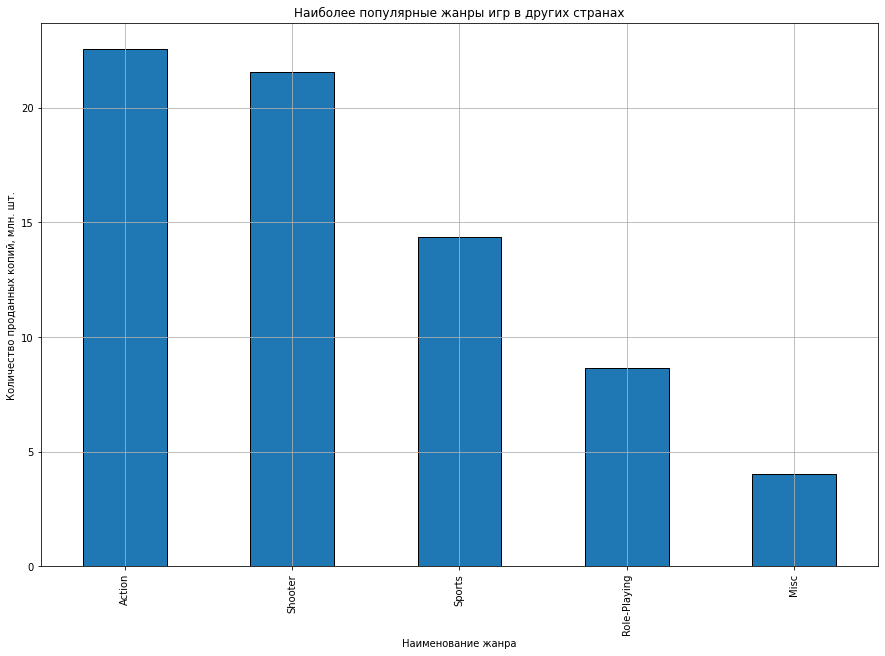

In [70]:
# строим распределение по жанрам игр
games_2017.pivot_table(index='genre', values='other_sales', aggfunc='sum').sort_values(by='other_sales', ascending=False).\
head(5).plot.bar(grid=True, figsize=(15, 10), ec='black', legend=False) 
plt.title('Наиболее популярные жанры игр в других странах')
plt.xlabel('Наименование жанра')
plt.ylabel('Количество проданных копий, млн. шт.')
plt.show()

Здесь также видим сходную с Европой ситуацию: наиболее популярны Shooter и Action (при этом максимум симпатий приходится на Action). На 3-м месте также Sports

Text(0.5, 1.0, 'Продажи игр с различным рейтингом ESRB')

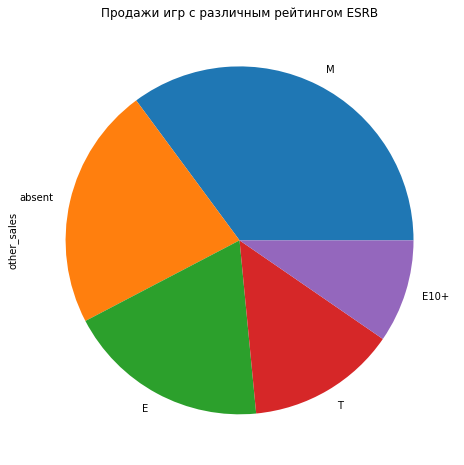

In [71]:
# строим круговую диаграмму
games_2017.pivot_table(index='rating', values='other_sales', aggfunc='sum').sort_values('other_sales', ascending=False).\
plot(kind ='pie', figsize=(8, 8), subplots=True, legend=False)

plt.title('Продажи игр с различным рейтингом ESRB')

Здесь ситуация аналогична той, которую мы видели в Северной Америке и Европе: почти половину круга занимают игры с рейтингом М (т.е. «Mature» — «От 17 лет»: когда материалы игры не подходят для возрастной категории младше 17 лет. Проекты с данным рейтингом могут содержать достаточно жестокое насилие, большое количество крови с расчленением, непристойные сексуальные сцены или грубую ненормативную лексику, нежелательную для младшей аудитории.

Вторые по популярности игры с рейтиргом Е (т.е. «Everyone» — «Для всех»: содержание вполне подходит для возрастной категории старше 6 лет; такие игры могут понравиться и взрослым. Игры с этим рейтингом могут содержать минимальное насилие, в основном «мультяшного» характера)

Таким образом, наиболее характерно для пользователей из других стран следующее:

- игровая платформа PS4
- жанры игр Shooter и Action
- игры категории М (от 17 лет) или Е (для возрастной категории старше 6 лет)

**Подводим итоги:**

- во всех рассмотренных регионах пользуются популярностью игры категории Е (для возрастной категории старше 6 лет) - в каждом из регионов игры данной категории занимают 2-е место по количеству проданных копий
- наиболее популярны в Северной Америке, Европе и других странах игры категории М (от 17 лет), тогда как в Японии - игры категории Т (для подростков 13 - 19 лет) 
- наиболее популярным жанром у пользователей из Северной Америки, Европы и других стран являются жанры игр Shooter и Action. В этом их отличие от пользователей из Японии, где наиболее популярны Role-Playing и Action
- в Северной Америке наиболее популярна игровая платформа PS4 или XOne, в Европе и других странах - PS4, в Японии - 3DS

### Проверка гипотез

**Проверим гипотезу о том, что средние пользовательские рейтинги платформ Xbox One и PC одинаковые**

Cформируем нулевую и альтернативную гипотезы:

- H0 - средние пользовательские рейтинги платформ Xbox One и PC одинаковые
- H1 - средние пользовательские рейтинги платформ Xbox One и PC разные

Используем статистический тест для независимых выборок - метод для проверки гипотезы о равенстве среднего двух генеральных совокупностей по взятым из них выборкам scipy.stats.ttest_ind(array1, array2, equal_var, alternative). Параметры метода:

- array1, array2 — наборы значений, которые содержат выборки
- equal_var - необязательный параметр. Он управляет тем, будет ли метод считать равными дисперсии выборок. Передается как equal_var=True или equal_var=False (True — считать, False — не считать). По умолчанию используется значение True. При этом из **обучающего курса Яндекс.Практикум** следует: "если выборки достаточно велики (30 и больше значений) и равны по размеру между собой, то такой подход оправдан. **Симуляции, проведённые учёными, показывают, что даже если дисперсии на самом деле не равны, то тест редко ошибается."**
- alternative - текстовый параметр, задающий альтернативную гипотезу. Варианты: 'two-sided', 'less', 'greater' (соответственно, двусторонняя, левосторонняя и правосторонняя H1). По умолчанию использунтся значение 'two-sided'. 




In [72]:
# задаем уровень статистической значимости (если p-value окажется меньше него, отвергнем гипотезу)
alpha = 0.01
results = st.ttest_ind(games_2017[games_2017['platform'] == 'XOne']['user_score'], games_2017[games_2017['platform'] == 'PC'\
]['user_score'])
# выводим на экран получившееся p-значение
print('p-значение:', results.pvalue)
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p-значение: 0.32800030965842586
Не получилось отвергнуть нулевую гипотезу


**Таким образом, при проверке на выборке из актуальных данных (т.е. с 2014 по 2016 год) не получилось отвергнуть гипотезу о том, что средние пользовательские рейтинги платформ Xbox One и PC одинаковые.**

**Проверим гипотезу от том, что средние пользовательские рейтинги жанров Action и Sports разные**

Cформируем нулевую и альтернативную гипотезы:

- H0 - средние пользовательские рейтинги жанров Action и Sports одинаковые
- H1 - средние пользовательские рейтинги жанров Action и Sports разные

Используем статистический тест для независимых выборок - метод для проверки гипотезы о равенстве среднего двух генеральных совокупностей по взятым из них выборкам scipy.stats.ttest_ind(array1, array2, equal_var, alternative). 

In [73]:
# задаем уровень статистической значимости (если p-value окажется меньше него, отвергнем гипотезу)
alpha = 0.01
results = st.ttest_ind(games_2017[games_2017['genre'] == 'Action']['user_score'], games_2017[games_2017['genre'] == 'Sports'\
]['user_score'])
# выводим на экран получившееся p-значение
print('p-значение:', results.pvalue)
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p-значение: 0.003247568418715718
Отвергаем нулевую гипотезу


**Таким образом, в результате проверки на выборке из актуальных данных (т.е. с 2014 по 2016 год) мы отвергаем гипотезу о том, что средние пользовательские рейтинги жанров Action и Sports одинаковые.**

### Общий вывод

Для проведения анализа представлены данные интернет-магазина "Стримчик" — информация о продажах игр, оценки пользователей и экспертов, жанры и платформы за период до 2016 года (файл /datasets/games.csv).

При этом выявлены следующие недостатки, связанные с качеством представленных данных:

1.	в 6 столбцах из 11 имелись пропуски данных. При этом значительная доля пропусков обнаружена в следующих столбцах: 

- rating - 40%
- critic_score - 51%
- user_score - 55%

2.	В столбцах использованы некорректные типы данных:

- для столбца year_of_release, в котором хранится информация о годе выпуска игры, использован вещественный тип вместо целочисленного
- для столбца user_score, в котором хранится информация об оценке пользователей, использован текстовый тип вместо вещественного

Наличие указанных недостатков, возможно, связано с ошибками при записи данных. В связи с этим рекомендуем проверять корректность данных при выгрузке и исправлять выявленные недостатки до направления данных на анализ. Соблюдение этой рекомендации будет способствовать существенному сокращению времени исследования и, соответственно, времени предоставления вам его результатов.

При подготовке данных к анализу нами была проведена обработка пропущенных значений и заменены типы данных для столбцов.
Для дальнейшего исследования мы добавили в таблицу столбец с рассчитанными значениями суммарных продаж во всех регионах.

В ходе исследования представленных данных установлено, что количество игр, которые выпускались в период с 1980 по 1990 год, не было значительным и обычно не превышало 20 в год (при этом виден рост выпущенных игр в 1981 и 1982 годах, за которым последовал спад). Количество выпущенных игр вновь стало расти начиная с 1991 года. Начиная с 1993 года, этот рост начал усиливаться и к 1995 году превысил значение 200. Взрывной рост количества игр продолжился до 1998 года (когда это количество приблизилось к 400), после чего вплоть до 2000 года наблюдается спад (что, возможно, связано с Азиатским финансовым кризисом, разразившимся в 1997 году в Юго-Восточной Азии, и ставшим самой серьезной проблемой мировой экономики в конце 90-х, а также экономическим кризисом в России в 1998 году). С 2000 по 2002 год в отрасли вновь наблюдается стремительный рост (количество выпущенных игр в этот период выросло с 350 до почти 830 в год). Затем мы видим незначительный спад до 2004 года и вновь резкий рост до 2008 (когда количество выпущенных игр превысило 1 400 в год, что стало максимальным значением за рассматриваемый период). После 2009 и до 2013 года мы видим резкое падение (так, в 2013 было выпущено всего около 540 игр. Очевидно, это связано в мировым экономическим кризисом 2008 - 2013 годов), затем незначительный рост с 2013 до 2015. После 2015 также наблюдаем спад. Скорее всего, он связан с тем, что данные за 2016 год неполные.

Для цели построения прогноза на 2017 год мы взяли период с 2014 по 2016 (так мы исключили устаревшие данные и ушедшие с рынка игровые платформы).

Также при проведении исследования выявлено следующее:

1.	большинство проданных копий игр приходится на платформы PS2, X360, PS3, Wii, DC и PS


2.	указанные выше платформы появлялись в 1994, 1998, 2005, 2006 (в этом году стартовали продажи 2-х платформ) и 2000, а исчезали в 2003, 2008, 2011, 2016 (в этот год прекратились продажи 3-х платформ). При этом **средний жизненный цикл отдельной платформы составил примерно 10 лет, а период активных продаж - 4 года**


3.	**по числу продаж в период с 2014 по 2016 год лидируют платформы PS4 и XOne**. За указанный период обе платформы показали похожую динамику продаж: рост продаж с 2014 по 2015, пик в 2015 году и затем спад. Но при этом объем продаж игр для платформы PS4 существенно (примерно вдвое) превышает объем продаж XOne: в 2014 году это 100 млн. копий против 55 млн. копий, в 2015 году - почти 120 млн. копий против 60 млн. копий и в 2016 году - 70 млн. копий против 26 млн. копий. Таким образом, **платформа PS4 является потенциально более прибыльной**


4.	ориентировочные границы нормального размаха суммарных продаж для каждой из представленных в таблице платформ не превышают значения 2 млн. копий. Более высокие значения отображены как выбросы. Там, где их количество невелико, они представлены отдельными точками. Там, где таких выбросов много, они сливаются в линию. В целом по столбцу total_sales датафрейма с информацией за интересующий нас период (с 2014 по 2016) медиана составляет 0,10 млн. копий, среднее - 0,43 млн. копий. Наличие выбросов, скорее всего, связано с тем, что в рамках каждой платформы есть наиболее успешные игры с большим объемом продаж. Для интересующих нас платформ PS4 и XOne границы нормального размаха совпадают: от 0 до 1,7 млн. копий


5.	выявлена следующая закономерность:

- с ростом оценки критиков (т.е. с увеличением поставленного балла) растут и продажи, но зависимость выражена слабо
- зависимость продаж от оценки пользователей отсутствует


6.	**самые "прибыльные" жанры - это Shooter, Sports, Action**. Жанры с низкими продажами: Strategy, Puzzle, Adventure. При этом необходимо учесть, что мы не оцениваем здесь ни выручку, ни прибыль, которые приносит продажа игр разных жанров (т.к. у нас отсутствуют данные по стоимости каждой отдельной игры и расходах на ее создание, маркетинг, производство)


7.	составлен **портрет пользователя каждого из регионов** (в представленных данных это Северная Америка, Европа, Япония и "другие страны"):


- во всех рассмотренных регионах пользуются популярностью игры категории Е (для возрастной категории старше 6 лет) - в каждом из регионов игры данной категории занимают 2-е место по количестве проданных копий

- наиболее популярны в Северной Америке, Европе и "других странах" игры категории М (от 17 лет), тогда как в Японии - игры категории Т (для подростков 13 - 19 лет)

- наиболее популярным жанром у пользователей из Северной Америки, Европы и "других стран" являются жанры игр Shooter и Action. В этом их отличие от пользователей из Японии, где наиболее популярны Role-Playing и Action

- в Северной Америке наиболее популярна игровая платформа PS4 или XOne, в Европе и "других странах" - PS4, в Японии - 3DS


8.	при проверке на выборке из актуальных данных (т.е. с 2014 по 2016 год) **не получилось отвергнуть гипотезу о том, что средние пользовательские рейтинги платформ Xbox One и PC одинаковые**


9.	в результате проверки на выборке из актуальных данных (т.е. с 2014 по 2016 год) мы **отвергаем гипотезу о том, что средние пользовательские рейтинги жанров Action и Sports одинаковые**
